# <font color = 'red'>CREDIT EDA CASE STUDY</font>

### Problem Statement :

<b>The Loan providing companies facing issues to give loans to the people due to their insufficient or non-existent credit history, because of that some consumers taking it as advantage and becoming Defaulter,here we need to help financial company to find out applicants who is capable to repay the loan by performing EDA Analysis.</b>

### Objectives :

<b>To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  We need to use EDA techniques to find out the driving factors & provide recommendations to the company based on our findings.</b>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

## 1. Reading the Dataset

We have been given two sets of data
1. current application
2. previous application

<b>Load both the datasets</b>

In [2]:
# Reading current application dataset
curr_appl = pd.read_csv('application_data.csv')

# Reading previous application dataset
prev_appl = pd.read_csv('previous_application.csv')

<b> we have added first few steps of data inspection of current application along with Previous application in order to understand the data and for better analysis.</b>

## 2. Inspecting and Understanding the Data

In [3]:
# First 5 records in the current application data
curr_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#first 5 records in the previous application data
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the number of rows and columns in the current application dataframe
curr_appl.shape

(307511, 122)

In [6]:
# Checking the number of rows and columns in the previous application dataframe
prev_appl.shape

(1670214, 37)

In [7]:
# Checking column wise information of the current application
curr_appl.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Checking column wise information of the previous application
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
# Checking statistics of the current application
curr_appl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
# Checking statistics of the previous application
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 3. Data Cleaning of current application dataset

In [11]:
# Accounting for missing data in the current application

null_col_curr = curr_appl.isnull().sum()/len(curr_appl.index)*100
null_col_curr.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

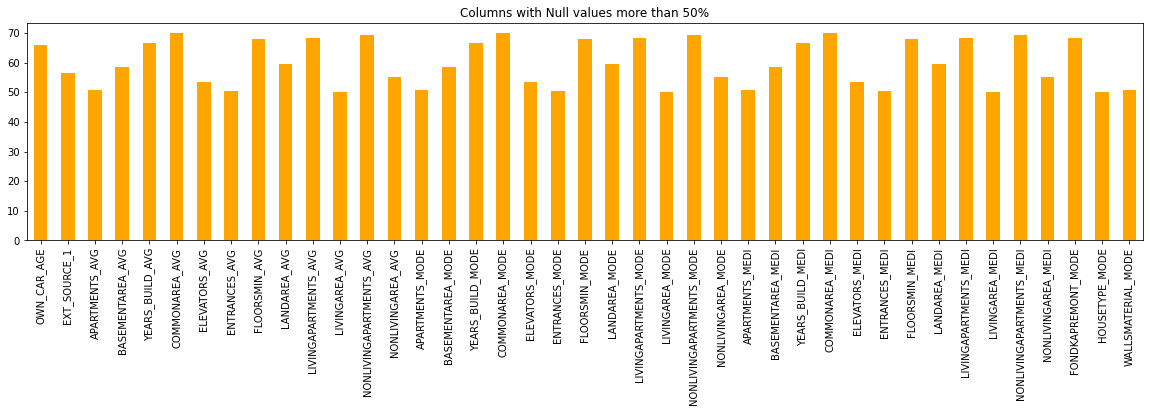

In [12]:
# Representing graphically the null columns with 50% or more null values
null_col_curr = null_col_curr[null_col_curr.values>50]

plt.figure(figsize=(20,4))
null_col_curr.plot(kind='bar',color="orange")
plt.title('Columns with Null values more than 50%')
plt.show()


In [13]:
# From the above output, we can see that there are columns which have a very high percentage of null values. 
# Let's us try to understand better:

high_null_col_curr = null_col_curr[null_col_curr.values>50]
print("Description of columns containing more than 50% of null values: ")
print('')
print(high_null_col_curr.sort_values(ascending = False))
print('')
print("Number of such high null columns: {}".format(len(high_null_col_curr)))

Description of columns containing more than 50% of null values: 

COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MODE               59.376738
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_AVG     

- There are 41 columns which have null values greater than 50%. Considering the magnitude of % of null values, it is safe to drop them.

In [14]:
# Drop these 41 columns from dataset
high_null_col_curr = list(null_col_curr[null_col_curr.values>50].index)
curr_appl.drop(labels = high_null_col_curr, axis = 1, inplace = True)
curr_appl.shape

(307511, 81)

In [15]:
# To recheck the data set and to get a sense of what all columns remain
curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [16]:
# Let's recheck what percentage of null values still remain in:

null_col_curr = curr_appl.isnull().sum()/len(curr_appl.index)*100
null_col_curr.sort_values(ascending = False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [17]:
# From the above output, we can see that there are columns which majorly have a low high percentage of null values. 
# Let's us try to understand better:

low_null_col_curr = null_col_curr[(null_col_curr.values<50) & (null_col_curr.values>0)]
print("Description of columns containing less than 50% of null values: ")
print('')
print(low_null_col_curr.sort_values(ascending = False))
print('')
print("Number of such low null columns: {}".format(len(low_null_col_curr)))

Description of columns containing less than 50% of null values: 

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_

<b>From all the 26 columns, we can comfortably drop the following columns:</b>

1. Ext_SOURCE_2
2. EXT_SOURCE_3
3. OBS_30_CNT_SOCIAL_CIRCLE
4. DEF_30_CNT_SOCIAL_CIRCLE
5. OBS_60_CNT_SOCIAL_CIRCLE
6. DEF_60_CNT_SOCIAL_CIRCLE
7. DAYS_LAST_PHONE_CHANGE
8. AMT_REQ_CREDIT_BUREAU_HOUR
9. AMT_REQ_CREDIT_BUREAU_DAY
10. AMT_REQ_CREDIT_BUREAU_WEEK
11. AMT_REQ_CREDIT_BUREAU_MON
12. AMT_REQ_CREDIT_BUREAU_QRT
13. AMT_REQ_CREDIT_BUREAU_YEAR
14. FLOORSMAX_MEDI
15. FLOORSMAX_AVG
16. FLOORSMAX_MODE
17. YEARS_BEGINEXPLUATATION_AVG
18. YEARS_BEGINEXPLUATATION_MODE
19. YEARS_BEGINEXPLUATATION_MEDI
20. TOTALAREA_MODE
21. EMERGENCYSTATE_MODE

- Since these columns will not be aiding our analysis.  We have consciously chosen to omit out OCCUPATION_TYPE from our selection of 21 columns above,since it is an important categorical variable even though it has about 31% null values.

In [18]:
# Drop_col_curr contains all the columns which will not be aiding our analysis:

#Listing out all the columns in current application
list_curr_appl = list(curr_appl.columns)

# Using a custom fucntion to aid us to create a dateframe containing all the columns that will not help us with analysis
drop_col_curr = [column for column in list_curr_appl if column.startswith('OBS_') or column.startswith('DEF_') or column.startswith('AMT_REQ_CREDIT') or column.startswith('EXT_') or column.startswith('DAYS_LAST_PHONE') or column.startswith('FLOORSMAX_') or column.startswith('YEARS_BEGINEXPLUATATION_') or column.startswith('TOTALAREA_MODE') or column.startswith('EMERGENCYSTATE_MODE')]
print(drop_col_curr) # printing it out to be sure we are dropping the desired columns

# Dropping the columns from our main dataframe
curr_appl.drop(labels = drop_col_curr, axis = 1, inplace = True)

['EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [19]:
# After dropping these columns, rechecking what percentage of null values still remain:

null_col_curr = curr_appl.isnull().mean()*100
null_col_curr

low_null_col_curr= null_col_curr[(null_col_curr.values<50) & (null_col_curr.values>0)]
print("Description of columns containing less than 50% of null values: ")
print('')
print(low_null_col_curr.sort_values(ascending = False))
print('')
print("Number of such low null columns: {}".format( len(low_null_col_curr)))

Description of columns containing less than 50% of null values: 

OCCUPATION_TYPE    31.345545
NAME_TYPE_SUITE     0.420148
AMT_GOODS_PRICE     0.090403
AMT_ANNUITY         0.003902
CNT_FAM_MEMBERS     0.000650
dtype: float64

Number of such low null columns: 5


<b> Inferences:</b>

We have reduced the number of columns with low percentage(%) of null values from 26 columns to 5 columns.

For these remaining 5 columns, we can attempt to impute the missing values in real world scenario and following are the steps which will help us to implement (Optional).

1. For OCCUPATION_TYPE, since it is an important categorical value, we'll mark the null values as missing.

2. For AMT_ANNUITY, since an annuity is a contract between you and an insurance company in which you make a lump-sum payment or  series of payments and, in return, receive regular disbursements, beginning either immediately or at some point in the future, we'll impute the missing values as 0 since we can never be exactly sure of what values these were. Since the percentage is less than 0.01, hence imputing them 0 will not affect our analysis.

3. We'll use the same logic for AMT_GOODS_PRICE

4. For NAME_TYPE_SUITE is an object type and we can impute the missing values with mode().

5. For CNT_FAM_MEMBERS, given a very low quantity of null values, we can impute the missing value with the median so to not affect the overall analysis.

In [20]:
# We begin with finding the values that will be used for imputing the missing values in the above cases:

print("Value_Counts for CNT_FAM_MEMBERS: ") 
print('\n')
print(curr_appl.CNT_FAM_MEMBERS.value_counts())
print('\n')
print("Using Describe for CNT_FAM_MEMBERS")
print(curr_appl.CNT_FAM_MEMBERS.describe())
print('\n')

#The median value is at 2 and hence we will impute the missing values with the median.

print("Value_Counts for NAME_TYPE_SUITE")
print(curr_appl.NAME_TYPE_SUITE.value_counts())

#The mode value is 'unaccompanied' and hence we will impute the missing values with the mode value.

# None of the missing values has been imputed. Aove codes are helping us to understands the values which can be imputed.

Value_Counts for CNT_FAM_MEMBERS: 


2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


Using Describe for CNT_FAM_MEMBERS
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


Value_Counts for NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [21]:
# Reviewing the shape of the current application dataframe after dropping off columns which are not required for analysis.
curr_appl.shape

(307511, 60)

In [22]:
# Reviewing the data types of the columns of the current application dataframe 
curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
# Let us further drop columns which will not be aiding our analysis:

# Listing out all the columns in current application
list_curr_appl = list(curr_appl.columns)

# Using a custom fucntion to aid us to create a dateframe containing all the columns that will not help us with analysis
drop_col_curr = [column for column in list_curr_appl if column.startswith('FLAG_DOCUMENT_') ]
print(drop_col_curr) # printing it out to be sure we are dropping the desired columns

# Dropping the columns from our main dataframe
curr_appl.drop(labels = drop_col_curr, axis = 1, inplace = True)
curr_appl.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis = 1, inplace = True)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [24]:
# Checking the final version of the current application dataset
fnl_curr_appl = curr_appl
fnl_curr_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion


In [25]:
# Reviewing the data types of the columns of the final version of current application dataframe:
fnl_curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [26]:
#Final current_application statistics
fnl_curr_appl.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


From the data given above, we can see that:

'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH is given by number of days which firstly can be convereted into years to aid readability of data as well as we need to take the absolute figure of them since they are given in the negative.

<b>This operation is performed in the following steps:</b>

In [27]:
# STEP-1
fnl_curr_appl['DAYS_BIRTH']=fnl_curr_appl['DAYS_BIRTH'].abs()
#For better understanding, we converted into the Age of the person and renamed the column as AGE_CLIENT
fnl_curr_appl['DAYS_BIRTH'] = round((fnl_curr_appl['DAYS_BIRTH'] // 365))
fnl_curr_appl.rename(columns={'DAYS_BIRTH':'AGE_CLIENT'},inplace=True)

# STEP-2 
fnl_curr_appl['DAYS_EMPLOYED']=fnl_curr_appl['DAYS_EMPLOYED'].abs()
#For better understanding, we converted the data into years of work experience and renamed the column as WORK_EX_CLIENT
fnl_curr_appl['DAYS_EMPLOYED'] = round((fnl_curr_appl['DAYS_EMPLOYED'] // 365))
fnl_curr_appl.rename(columns={'DAYS_EMPLOYED':'WORK_EX_CLIENT'},inplace=True)

# STEP-3
fnl_curr_appl['DAYS_REGISTRATION']=fnl_curr_appl['DAYS_REGISTRATION'].abs()
#For better understanding, we converted the data into years and renamed the column as YEARS_REGISTRATION
fnl_curr_appl['DAYS_REGISTRATION'] = round((fnl_curr_appl['DAYS_REGISTRATION'] // 365))
fnl_curr_appl.rename(columns={'DAYS_REGISTRATION':'YEARS_REGISTRATION'},inplace=True)

# STEP-4
fnl_curr_appl['DAYS_ID_PUBLISH']=fnl_curr_appl['DAYS_ID_PUBLISH'].abs()
#For better understanding, we converted the data into years and renamed the column as YEARS_ID_PUBLISH
fnl_curr_appl['DAYS_ID_PUBLISH'] = round((fnl_curr_appl['DAYS_ID_PUBLISH'] // 365))
fnl_curr_appl.rename(columns={'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

In [28]:
#Reviewing Final_Current_application statistics

fnl_curr_appl.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
AGE_CLIENT,307511.0,43.435968,11.954593,20.00000,34.000000,43.00000,53.000000,6.900000e+01
WORK_EX_CLIENT,307511.0,185.021521,381.972190,0.00000,2.000000,6.00000,15.000000,1.000000e+03


While reviewing the statistics again, we found that:

1. 'CNT_CHILDREN' i.e the maximum count of the children is shown as 19 which is clearly an outlier.

2. 'AMT_INCOME_TOTAL' has a maximum value of 117000000 which is a huge variation from the 75th percentile.

3. 'AMT_CREDIT',here the maximum value of 4050000 is very far from the median and the 75th percentile.

4. 'AMT_GOODS_PRICE', here the maximum value of 4050000 is very far from the median and 75th percentile value.

5. 'WORK_EX_CLIENT' has a clear outlier with a maximum value of 1000.

## 4. Handling Outliers

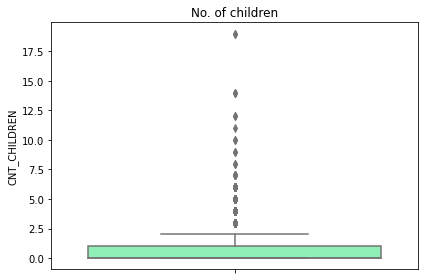

In [29]:
#1 CNT_CHILDREN

sns.boxplot(y=fnl_curr_appl['CNT_CHILDREN'], palette = 'rainbow',orient ='h')
plt.title('No. of children', fontweight = 5)

plt.tight_layout()
plt.show()

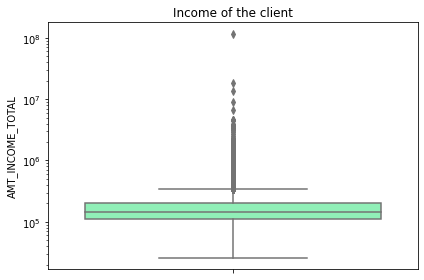

In [30]:
#2 AMT_INCOME_TOTAL

sns.boxplot(y=fnl_curr_appl['AMT_INCOME_TOTAL'], orient = 'v', palette = 'rainbow')
plt.title('Income of the client', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

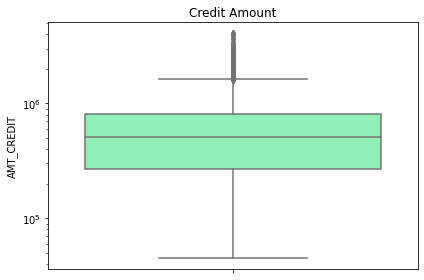

In [31]:
#3 AMT_CREDIT

sns.boxplot(y=fnl_curr_appl['AMT_CREDIT'], orient = 'v', palette = 'rainbow')
plt.title('Credit Amount', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

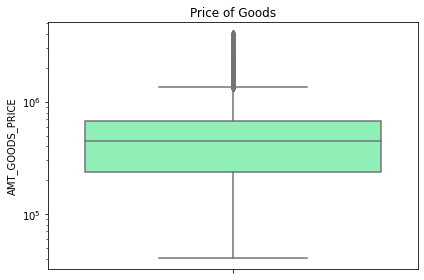

In [32]:
#4 AMT_GOODS_PRICE

sns.boxplot(y=fnl_curr_appl['AMT_GOODS_PRICE'], orient = 'v', palette = 'rainbow')
plt.title('Price of Goods', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

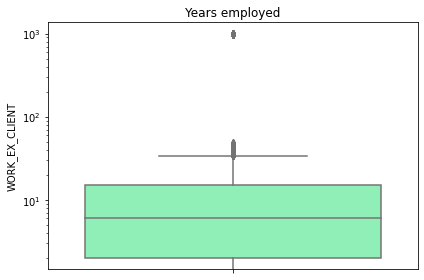

In [33]:
#5 'WORK_EX_CLIENT'

sns.boxplot(y=fnl_curr_appl['WORK_EX_CLIENT'], orient = 'v', palette = 'rainbow')
plt.title('Years employed', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

<b>We have done outliers treatment of above five variables as the outliers heavily influeced the plots and hindering the analysis</b>

#### Remove the outliers

In [34]:
#Now, let us remove the outliers from the 99th percentile:

curr_outlier_cols=['AMT_INCOME_TOTAL','WORK_EX_CLIENT','AMT_GOODS_PRICE','CNT_CHILDREN','AMT_CREDIT']
for col in curr_outlier_cols:
    qntl = fnl_curr_appl[col].quantile(0.99)
    fnl_curr_appl=fnl_curr_appl[fnl_curr_appl[col] < qntl]
    

<b> Let's relook at the 5 variablrs</b>

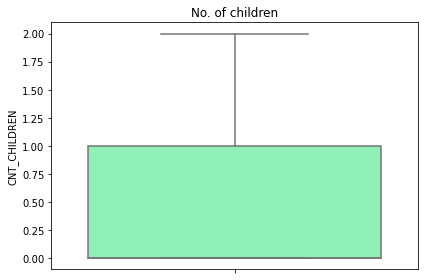

In [35]:
#1 CNT_CHILDREN 

sns.boxplot(y=fnl_curr_appl['CNT_CHILDREN'], palette = 'rainbow', orient = 'h')
plt.title('No. of children', fontweight = 5)

plt.tight_layout()
plt.show()

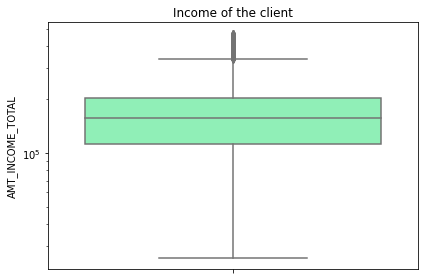

In [36]:
#2 AMT_INCOME_TOTAL

sns.boxplot(y=fnl_curr_appl['AMT_INCOME_TOTAL'], orient = 'v', palette = 'rainbow')
plt.title('Income of the client', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

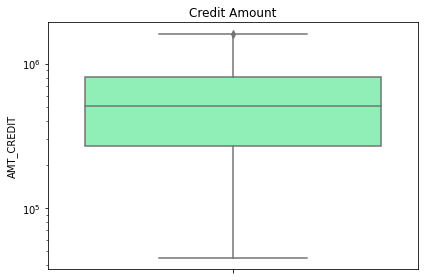

In [37]:
#3 AMT_CREDIT

sns.boxplot(y=fnl_curr_appl['AMT_CREDIT'], orient = 'v', palette = 'rainbow')
plt.title('Credit Amount', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

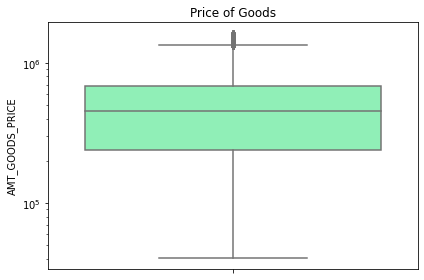

In [38]:
#4 AMT_GOODS_PRICE

sns.boxplot(y=fnl_curr_appl['AMT_GOODS_PRICE'], orient = 'v', palette = 'rainbow')
plt.title('Price of Goods', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

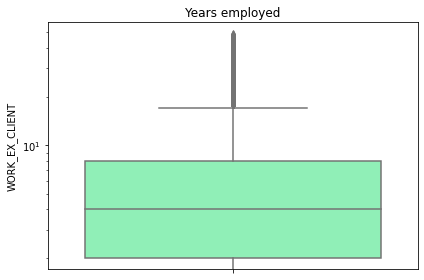

In [39]:
#5 'WORK_EX_CLIENT'

sns.boxplot(y=fnl_curr_appl['WORK_EX_CLIENT'], orient = 'v', palette = 'rainbow')
plt.title('Years employed', fontweight = 10)
plt.yscale('log')

plt.tight_layout()
plt.show()

In [40]:
#Reviewing final_current_application statistics after removing the outliers

fnl_curr_appl.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,239764.0,278175.188406,102828.365154,100002.00000,189078.750000,278155.50000,367166.250000,4.562550e+05
TARGET,239764.0,0.087657,0.282796,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,239764.0,0.453938,0.678815,0.00000,0.000000,0.00000,1.000000,2.000000e+00
AMT_INCOME_TOTAL,239764.0,167250.343285,76282.710523,25650.00000,112500.000000,157500.00000,202500.000000,4.688235e+05
AMT_CREDIT,239764.0,577861.921414,353006.085383,45000.00000,270126.000000,509602.50000,808650.000000,1.618767e+06
AMT_ANNUITY,239752.0,26872.536550,13370.036864,1980.00000,16875.000000,25348.50000,34465.500000,1.507590e+05
AMT_GOODS_PRICE,239764.0,517864.140359,321967.206763,40500.00000,238500.000000,450000.00000,679500.000000,1.615500e+06
REGION_POPULATION_RELATIVE,239764.0,0.020663,0.013524,0.00029,0.010006,0.01885,0.028663,7.250800e-02
AGE_CLIENT,239764.0,39.939386,10.095748,20.00000,32.000000,39.00000,48.000000,6.900000e+01
WORK_EX_CLIENT,239764.0,6.008417,6.419505,0.00000,2.000000,4.00000,8.000000,4.900000e+01


#### After removing the outliers, the data now seems to make more sense from an analysis point of view.

In [41]:
#To further make sense of data, we have created bins for income and loan amounts:

#Categories for Income:

bins_1 = [0,100000,200000,300000,400000,500000]
labels_1 = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000']

fnl_curr_appl['INCOME_GROUP']=pd.cut(x=fnl_curr_appl['AMT_INCOME_TOTAL'],bins=bins_1,labels=labels_1)

# For better readability, shifting the newly created INCOME_GROUP column after TARGET column

mid_1 = fnl_curr_appl['INCOME_GROUP']
fnl_curr_appl.drop(labels=['INCOME_GROUP'], axis=1, inplace = True)
fnl_curr_appl.insert(2,'INCOME_GROUP', mid_1)

#Categories for loan Amount:

bins_2= [0, 100000, 500000, 1000000, 1500000, 2000000]
labels_2 = ['0-100000', '100000-500000','500000-1000000', '1000000-1500000', '1500000-2000000']


fnl_curr_appl['LOAN_GROUP']=pd.cut(x=fnl_curr_appl['AMT_CREDIT'],bins=bins_2,labels=labels_2)


# For better readability, shifting the newly created LOAN_GROUP column after INCOME_GROUP column
mid_1 = fnl_curr_appl['LOAN_GROUP']
fnl_curr_appl.drop(labels=['LOAN_GROUP'], axis=1, inplace = True)
fnl_curr_appl.insert(3,'LOAN_GROUP', mid_1)

# Dropping 'AMT_INCOME_TOTAL' and Dropping 'AMT_CREDIT' since we no longer require them: 
#fnl_curr_appl.drop("AMT_INCOME_TOTAL",axis=1,inplace=True)
#fnl_curr_appl.drop("AMT_CREDIT",axis=1,inplace=True)
# although we mentioned dropping the above columns but on second review we chose to retain for analysing further.

In [42]:
# Reviewing first 5 rows of the fnl_curr_appl dataframe:
fnl_curr_appl.head()

,SK_ID_CURR,TARGET,INCOME_GROUP,LOAN_GROUP,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,200000-300000,100000-500000,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,200000-300000,1000000-1500000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,School
2,100004,0,0-100000,100000-500000,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,Government
3,100006,0,100000-200000,100000-500000,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,26.0,6,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,100000-200000,500000-1000000,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,11.0,9,Core staff,1.0,2,2,Religion


In [43]:
fnl_curr_appl.shape

(239764, 28)

In [44]:
fnl_curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239764 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   239764 non-null  int64   
 1   TARGET                       239764 non-null  int64   
 2   INCOME_GROUP                 239764 non-null  category
 3   LOAN_GROUP                   239764 non-null  category
 4   NAME_CONTRACT_TYPE           239764 non-null  object  
 5   CODE_GENDER                  239764 non-null  object  
 6   FLAG_OWN_CAR                 239764 non-null  object  
 7   FLAG_OWN_REALTY              239764 non-null  object  
 8   CNT_CHILDREN                 239764 non-null  int64   
 9   AMT_INCOME_TOTAL             239764 non-null  float64 
 10  AMT_CREDIT                   239764 non-null  float64 
 11  AMT_ANNUITY                  239752 non-null  float64 
 12  AMT_GOODS_PRICE              239764 non-null

In [45]:
# Final check to see all the variables have sound data and are of sound data type:

#fnl_curr_appl.columns

for c in fnl_curr_appl.columns:
    print("\n" + c)
    print('-'*30)
    print(fnl_curr_appl[c].value_counts())


SK_ID_CURR
------------------------------
102350    1
191496    1
156697    1
158744    1
136215    1
         ..
116370    1
122513    1
435838    1
441981    1
108597    1
Name: SK_ID_CURR, Length: 239764, dtype: int64

TARGET
------------------------------
0    218747
1     21017
Name: TARGET, dtype: int64

INCOME_GROUP
------------------------------
100000-200000    126517
200000-300000     54624
0-100000          42647
300000-400000     12047
400000-500000      3929
Name: INCOME_GROUP, dtype: int64

LOAN_GROUP
------------------------------
100000-500000      113023
500000-1000000      86688
1000000-1500000     32484
0-100000             4207
1500000-2000000      3362
Name: LOAN_GROUP, dtype: int64

NAME_CONTRACT_TYPE
------------------------------
Cash loans         215040
Revolving loans     24724
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER
------------------------------
F      150158
M       89602
XNA         4
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR
------------

<b>After viewing the value counts, we have 4 records that have XNA as gender which is not a valid category. Hence imputing F in place of XNA since Females count is much higher than males and imputing 4 such XNA as F will not impact the data set.</b>

In [46]:
fnl_curr_appl.loc[fnl_curr_appl['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
fnl_curr_appl.CODE_GENDER.value_counts()

F    150162
M     89602
Name: CODE_GENDER, dtype: int64

In [47]:
fnl_curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239764 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   239764 non-null  int64   
 1   TARGET                       239764 non-null  int64   
 2   INCOME_GROUP                 239764 non-null  category
 3   LOAN_GROUP                   239764 non-null  category
 4   NAME_CONTRACT_TYPE           239764 non-null  object  
 5   CODE_GENDER                  239764 non-null  object  
 6   FLAG_OWN_CAR                 239764 non-null  object  
 7   FLAG_OWN_REALTY              239764 non-null  object  
 8   CNT_CHILDREN                 239764 non-null  int64   
 9   AMT_INCOME_TOTAL             239764 non-null  float64 
 10  AMT_CREDIT                   239764 non-null  float64 
 11  AMT_ANNUITY                  239752 non-null  float64 
 12  AMT_GOODS_PRICE              239764 non-null

In [48]:
# Casting numeric variables into numeric datatype

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','AGE_CLIENT','WORK_EX_CLIENT','YEARS_REGISTRATION','YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

fnl_curr_appl[numeric_columns]=fnl_curr_appl[numeric_columns].apply(pd.to_numeric)

In [49]:
fnl_curr_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239764 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   239764 non-null  int64   
 1   TARGET                       239764 non-null  int64   
 2   INCOME_GROUP                 239764 non-null  category
 3   LOAN_GROUP                   239764 non-null  category
 4   NAME_CONTRACT_TYPE           239764 non-null  object  
 5   CODE_GENDER                  239764 non-null  object  
 6   FLAG_OWN_CAR                 239764 non-null  object  
 7   FLAG_OWN_REALTY              239764 non-null  object  
 8   CNT_CHILDREN                 239764 non-null  int64   
 9   AMT_INCOME_TOTAL             239764 non-null  float64 
 10  AMT_CREDIT                   239764 non-null  float64 
 11  AMT_ANNUITY                  239752 non-null  float64 
 12  AMT_GOODS_PRICE              239764 non-null

#### Now the data set is ready for further analysis

## 5. Analysis of current application data set

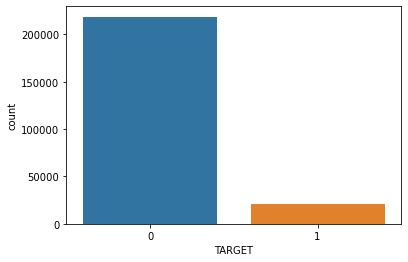

In [50]:
#Analyzing the count of Target Variable

sns.countplot(x= "TARGET",data =fnl_curr_appl)
plt.show()

# Target 0: Client without payment difficulties
# Target 1: Client with payment difficulties

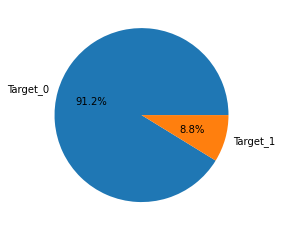

In [51]:
# To check imbalance percentage:

target_0_perc=100*(len(fnl_curr_appl.loc[fnl_curr_appl["TARGET"]==0])/len(fnl_curr_appl))
target_1_perc=100*(len(fnl_curr_appl.loc[fnl_curr_appl["TARGET"]==1])/len(fnl_curr_appl))
sizes=[target_0_perc,target_1_perc]
target_labels=['Target_0','Target_1']
plt.pie(sizes, labels=target_labels, autopct='%1.1f%%')
plt.show()

<b>Since there is a huge imbalance between the Target variables 0 and 1, it makes more sense to divide the dataframe into two sub datasets and then continue for analysis.</b>

In [52]:
# Dividing the dataset into two datasets: 
#1. target 1: client with payment difficulties
#2. target 0 : All other

target_0=fnl_curr_appl.loc[fnl_curr_appl["TARGET"]==0]
target_1=fnl_curr_appl.loc[fnl_curr_appl["TARGET"]==1]

In [53]:
# Viewing first 5 rows of TARGET 0 Dataframe

target_0.head()

,SK_ID_CURR,TARGET,INCOME_GROUP,LOAN_GROUP,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
1,100003,0,200000-300000,1000000-1500000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,School
2,100004,0,0-100000,100000-500000,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,Government
3,100006,0,100000-200000,100000-500000,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,26.0,6,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,100000-200000,500000-1000000,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,11.0,9,Core staff,1.0,2,2,Religion
5,100008,0,0-100000,100000-500000,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,4,13.0,1,Laborers,2.0,2,2,Other


In [54]:
# Viewing info about TARGET_0 Dataframe

target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218747 entries, 1 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   218747 non-null  int64   
 1   TARGET                       218747 non-null  int64   
 2   INCOME_GROUP                 218747 non-null  category
 3   LOAN_GROUP                   218747 non-null  category
 4   NAME_CONTRACT_TYPE           218747 non-null  object  
 5   CODE_GENDER                  218747 non-null  object  
 6   FLAG_OWN_CAR                 218747 non-null  object  
 7   FLAG_OWN_REALTY              218747 non-null  object  
 8   CNT_CHILDREN                 218747 non-null  int64   
 9   AMT_INCOME_TOTAL             218747 non-null  float64 
 10  AMT_CREDIT                   218747 non-null  float64 
 11  AMT_ANNUITY                  218735 non-null  float64 
 12  AMT_GOODS_PRICE              218747 non-null

In [55]:
# Viewing first 5 rows of TARGET 1 Dataframe

target_1.head()

,SK_ID_CURR,TARGET,INCOME_GROUP,LOAN_GROUP,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,200000-300000,100000-500000,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,Business Entity Type 3
26,100031,1,100000-200000,500000-1000000,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,7,18.0,5,Cooking staff,1.0,3,2,Business Entity Type 3
40,100047,1,200000-300000,1000000-1500000,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,3,3.0,2,Laborers,2.0,2,2,Business Entity Type 3
42,100049,1,100000-200000,100000-500000,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,9,0.0,12,Sales staff,2.0,3,3,Self-employed
94,100112,1,300000-400000,500000-1000000,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,27,5,13.0,2,NaN,1.0,2,2,Industry: type 4


In [56]:
# Viewing info about TARGET_1 Dataframe

target_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21017 entries, 0 to 307509
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   21017 non-null  int64   
 1   TARGET                       21017 non-null  int64   
 2   INCOME_GROUP                 21017 non-null  category
 3   LOAN_GROUP                   21017 non-null  category
 4   NAME_CONTRACT_TYPE           21017 non-null  object  
 5   CODE_GENDER                  21017 non-null  object  
 6   FLAG_OWN_CAR                 21017 non-null  object  
 7   FLAG_OWN_REALTY              21017 non-null  object  
 8   CNT_CHILDREN                 21017 non-null  int64   
 9   AMT_INCOME_TOTAL             21017 non-null  float64 
 10  AMT_CREDIT                   21017 non-null  float64 
 11  AMT_ANNUITY                  21017 non-null  float64 
 12  AMT_GOODS_PRICE              21017 non-null  float64 
 13  

### 5.1: Univariate Analysis for Categorical Variables of Current Application

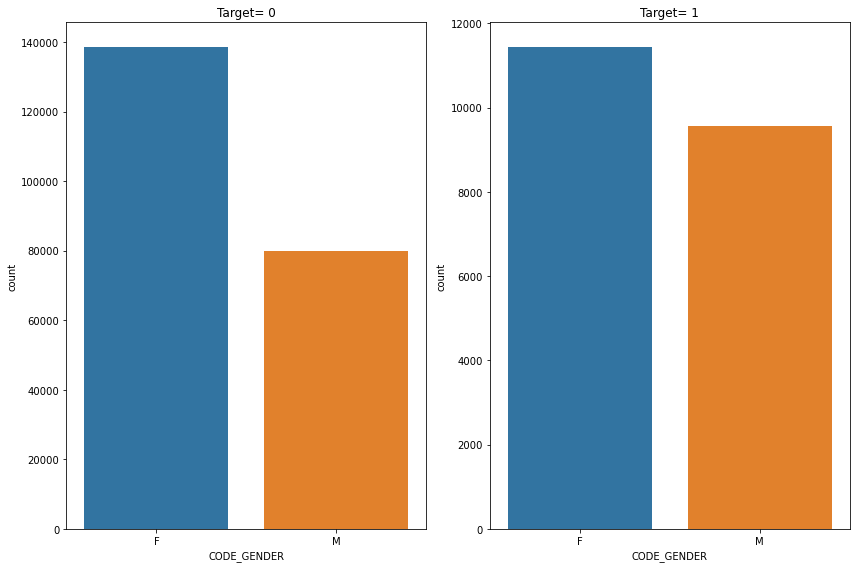

In [57]:
#Male/Female count for Target_0 and Target_1 Sub Dataset

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER', data=target_0,)
plt.title("Target= 0")

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER', order=target_1['CODE_GENDER'].value_counts(ascending = False).index,  data=target_1)
plt.title("Target= 1")

plt.tight_layout()
plt.show()

<b>For both Target 0 and Target 1, Female application count is more than Male application count. Owing to the data imbalance, the count for females having no payment difficulties far outnumbers the count for females having payment difficulties.
    
Keeping the above statistic in mind, we can make a proposition for prefering females over males when it comes to seeking recipients for loan.</b>

In [58]:
# Defining a custom function to plot various countplots for different categorical variables:

def plot_uni_categorical(column_name):    
    plt.figure(figsize=(12,8))
    
    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25
    

    plt.subplot(1,2,1)
    sns.countplot(x=column_name, data=target_0)
    plt.xticks(rotation=90)
    plt.title("Target= 0")

    plt.subplot(1,2,2)
    sns.countplot(x=column_name, data=target_1)
    plt.xticks(rotation=90)
    plt.title("Target= 1")

    plt.tight_layout()
    plt.show()

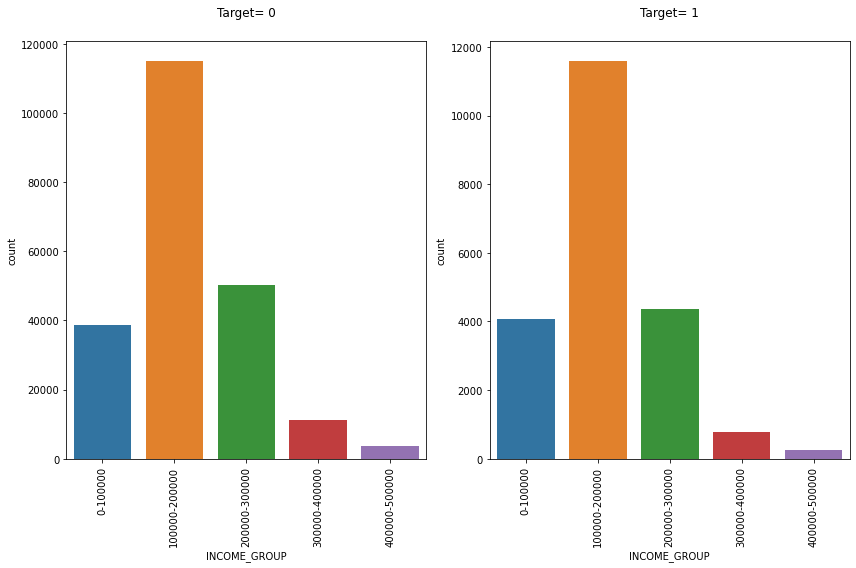

In [59]:
plot_uni_categorical('INCOME_GROUP')

<b>There is a similar proportion of people belonging to different income groups who either have no payment difficulties or are having payment difficulties. Though, the count for people belonging to different payment groups having no payment difficulties far outweighs the count for people belonging to different payment groups having payment difficulties.</b>

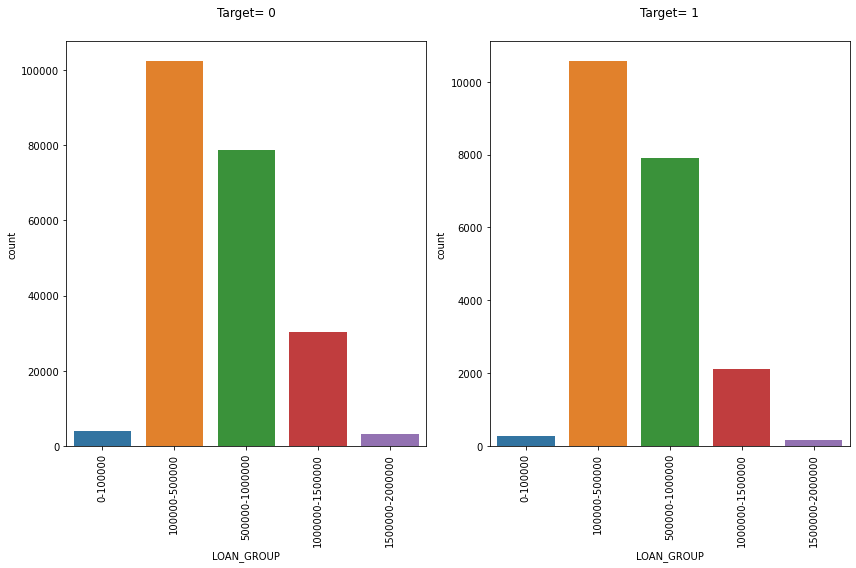

In [60]:
plot_uni_categorical('LOAN_GROUP')

<b>From persepective of red flags, highest number of defaulters belong to a loan group of Rs 1 Lac to Rs 5 Lac and the second highest number of defaulters belong to a loan group of Rs 5 Lac to Rs 10 Lac.</b>

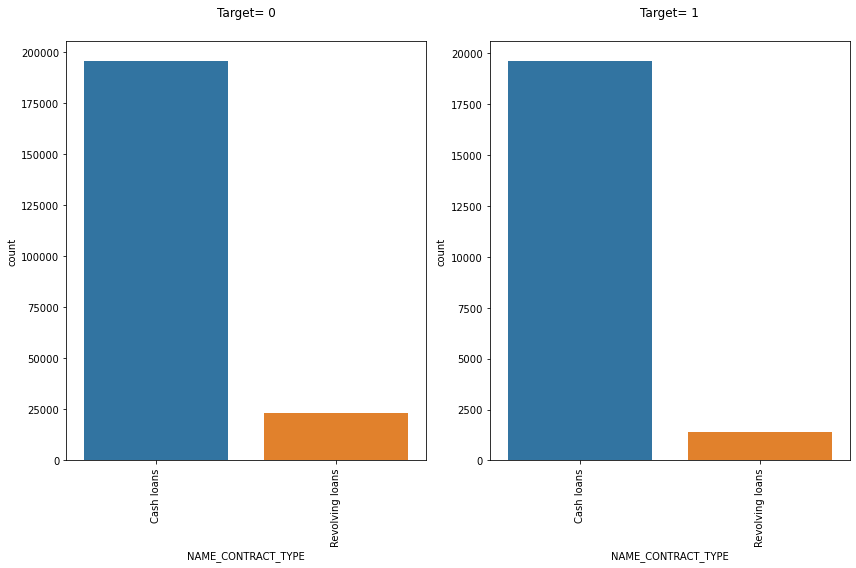

In [61]:
plot_uni_categorical('NAME_CONTRACT_TYPE')

<b>In name contract type of loans, cash loans are more than revolving loans for both Target 0 and Target 1 and in the case of Target 1, people find difficulties in paying loan back involving cash in comparison with revolving loans.</b>

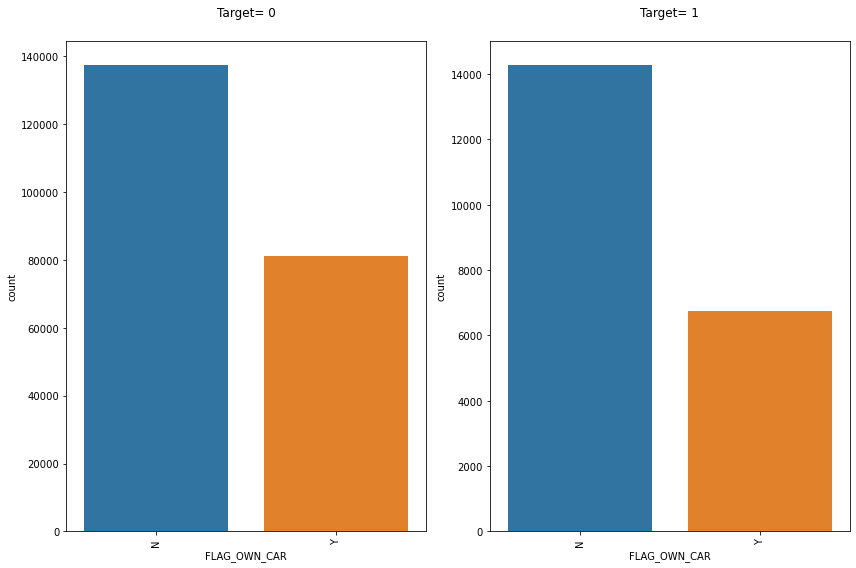

In [62]:
plot_uni_categorical('FLAG_OWN_CAR')

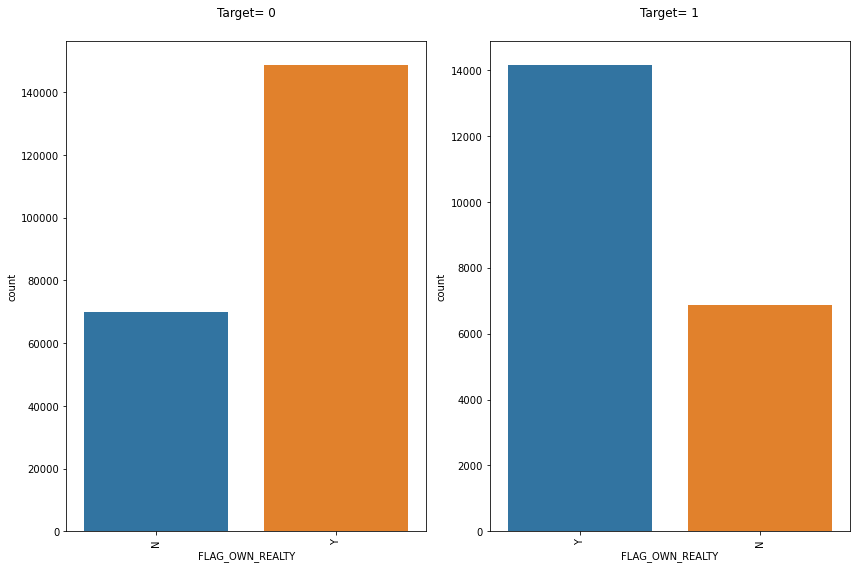

In [63]:
plot_uni_categorical('FLAG_OWN_REALTY')

- <b>Number of clients who owned houses are almost double than number of people who do not. Same is in the case of people who fail to pay loan back on time.
    
- People who do not own a car are almost double than people who own the car and similar in the case of people who fail to pay loan back on time.
    
- From the above two graphs on categorical variables, taking into account Target 1 statistics, not having a car and possessing a realty is a greater predictor of failing to pay the loan back on time.</b>

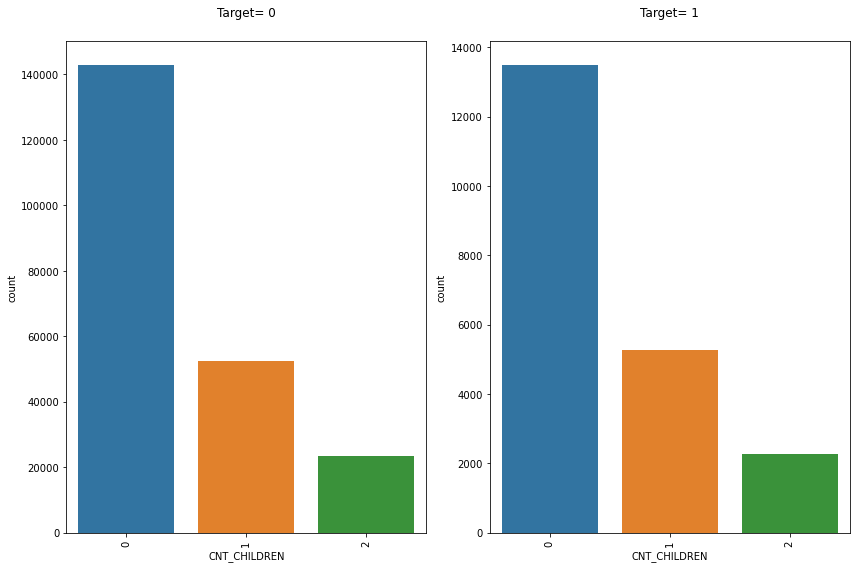

In [64]:
plot_uni_categorical('CNT_CHILDREN')

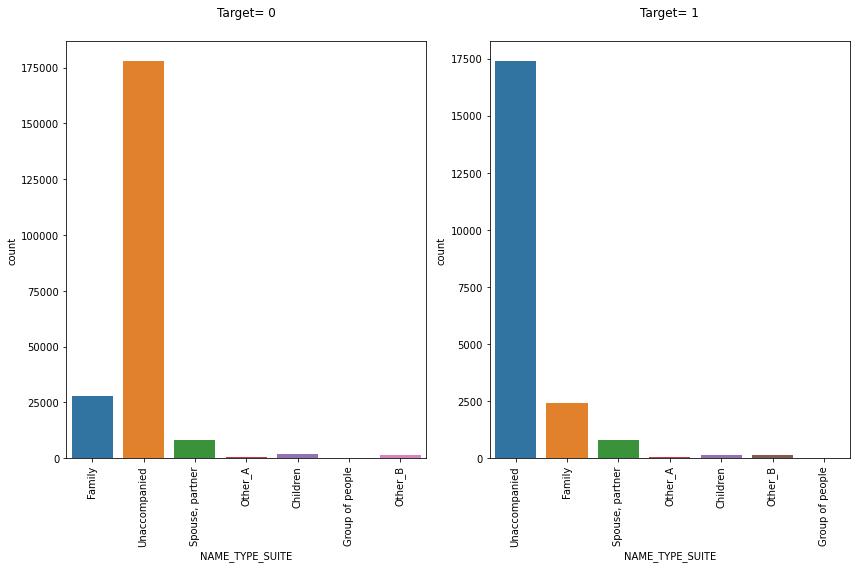

In [65]:
plot_uni_categorical('NAME_TYPE_SUITE')

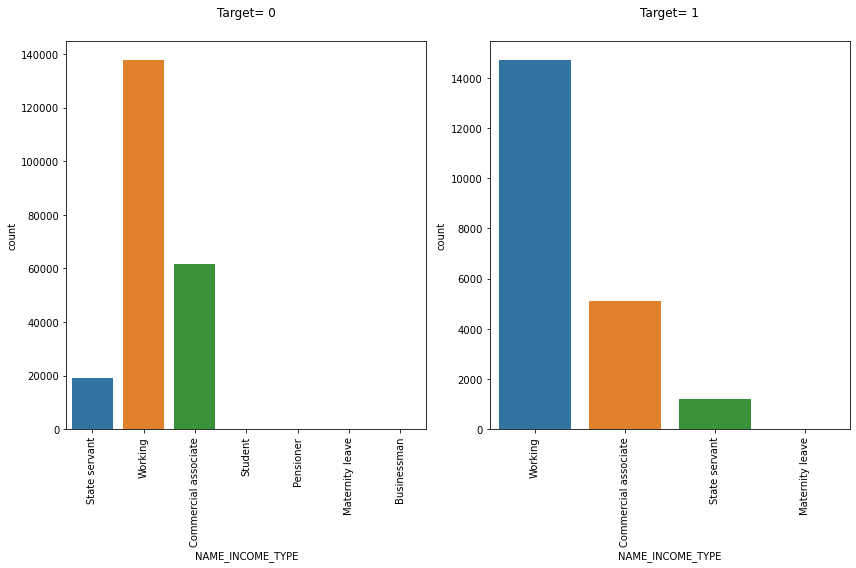

In [66]:

plot_uni_categorical('NAME_INCOME_TYPE')

<b>State servants are least in Name Income type to apply and default on loan whereas working professionals are the ones who apply most.</b>

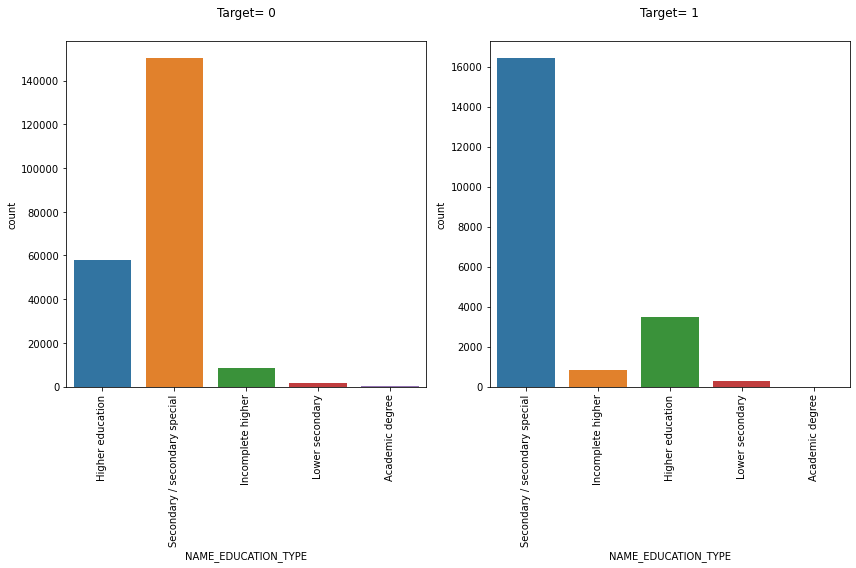

In [67]:
plot_uni_categorical('NAME_EDUCATION_TYPE')

<b>People with academic degree rarely apply for loan whereas people with secondary education are highest in application loan and default of loan payment.</b>

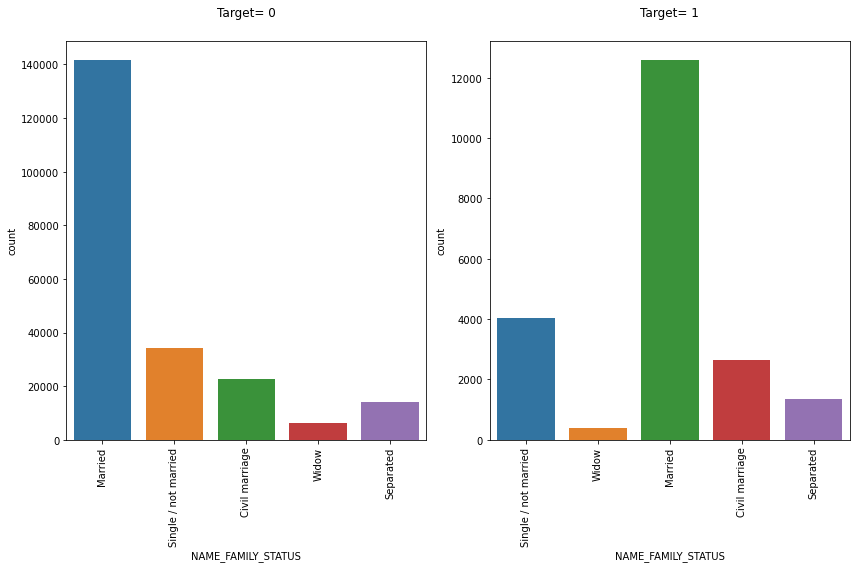

In [68]:
plot_uni_categorical('NAME_FAMILY_STATUS')

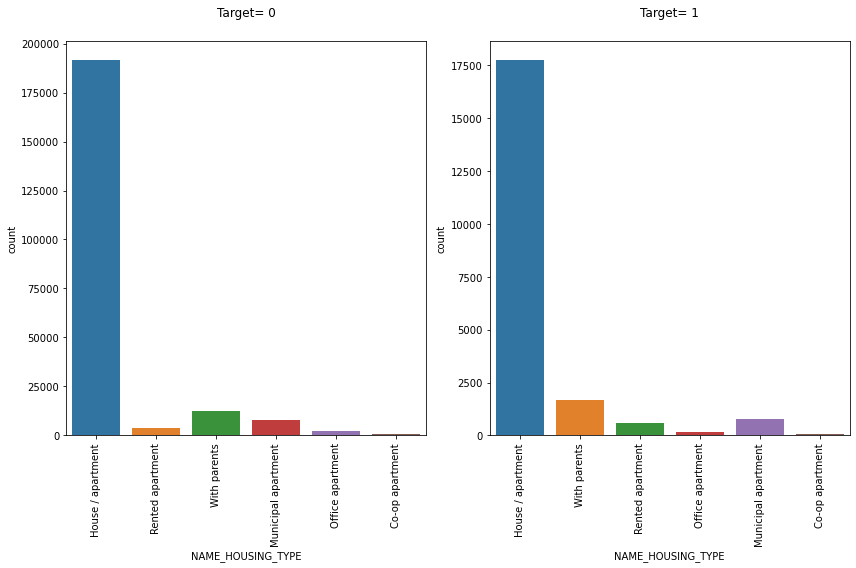

In [69]:
plot_uni_categorical('NAME_HOUSING_TYPE')

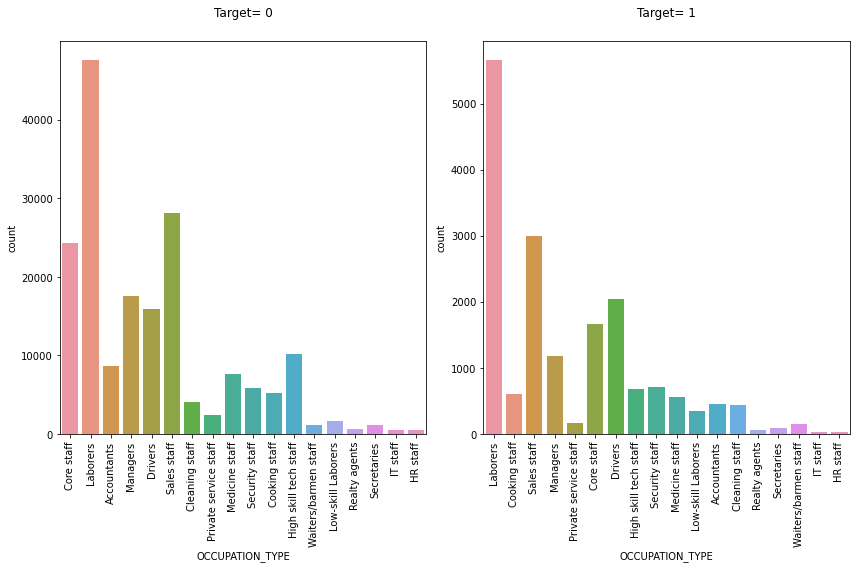

In [70]:
plot_uni_categorical('OCCUPATION_TYPE')

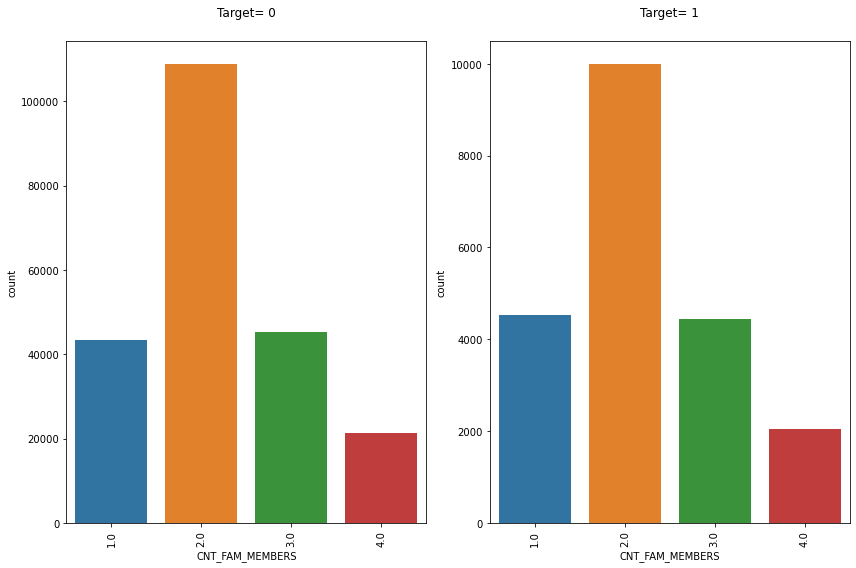

In [71]:
plot_uni_categorical('CNT_FAM_MEMBERS')

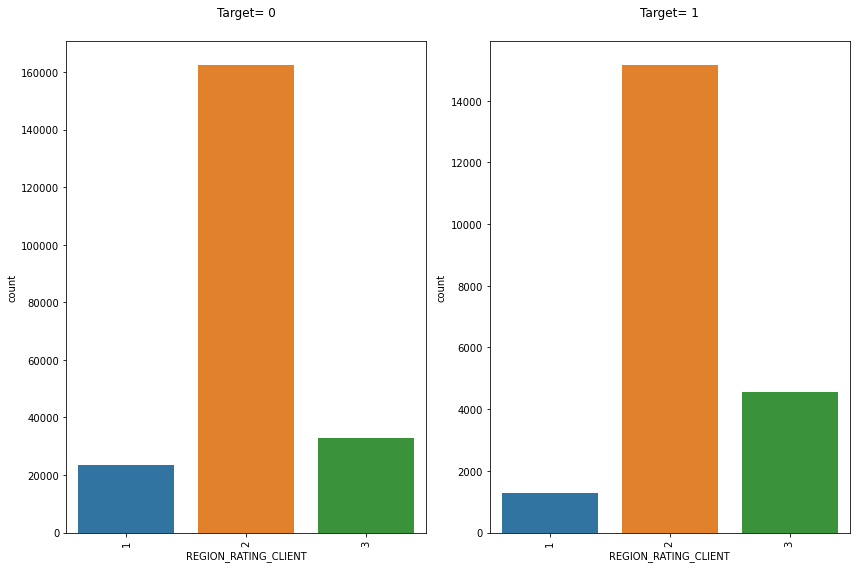

In [72]:
plot_uni_categorical('REGION_RATING_CLIENT')

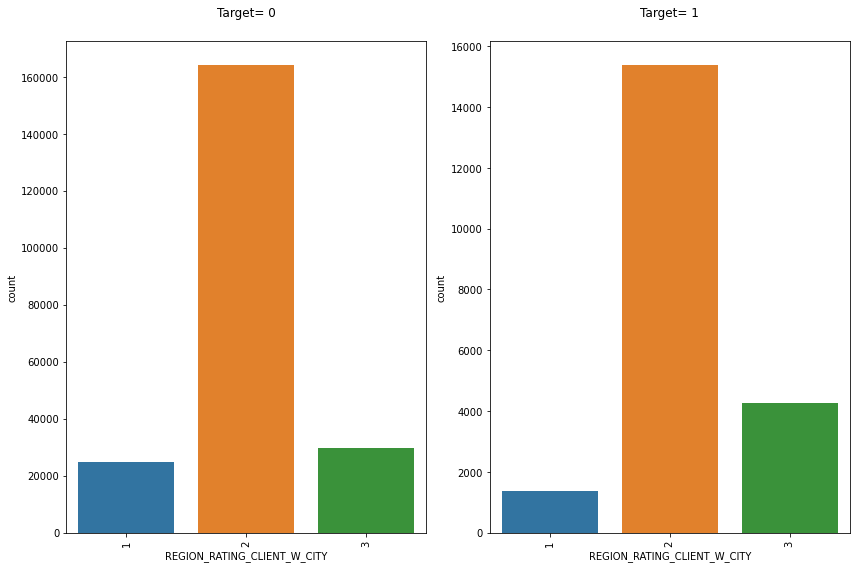

In [73]:
plot_uni_categorical('REGION_RATING_CLIENT_W_CITY')

### 5.2 Bivariate Analysis for Categorical Variables of Current Application

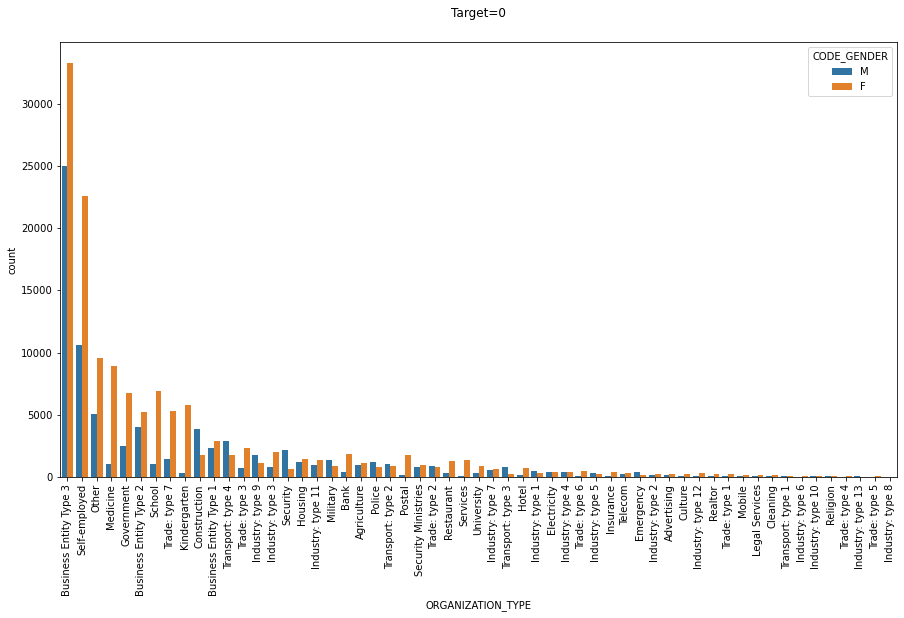

In [74]:
# For Target-0

plt.figure(figsize=(15,8))

plt.rcParams["axes.labelsize"]= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['axes.titlesize']= 12
plt.rcParams['axes.titleweight']= 10
plt.rcParams['axes.titlepad']= 25

sns.countplot(x='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts(ascending = False).index, hue="CODE_GENDER", hue_order=["M", "F"], data=target_0)
plt.xticks(rotation=90)
plt.title("Target=0")

plt.show()

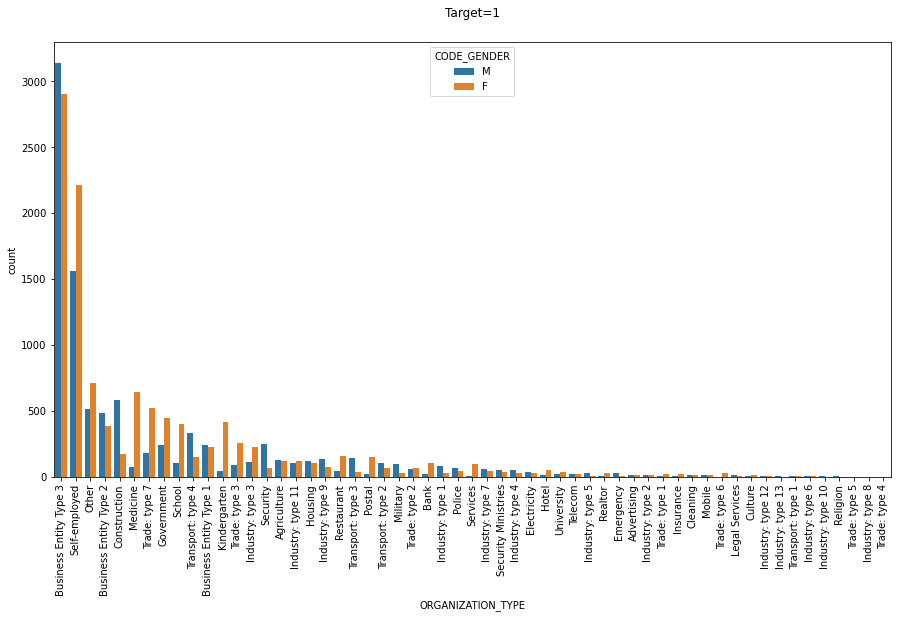

In [75]:
# For target-1

plt.figure(figsize=(15,8))

plt.rcParams["axes.labelsize"]= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['axes.titlesize']= 12
plt.rcParams['axes.titleweight']= 10
plt.rcParams['axes.titlepad']= 25

sns.countplot(x='ORGANIZATION_TYPE', order=target_1['ORGANIZATION_TYPE'].value_counts(ascending = False).index, hue="CODE_GENDER", hue_order=["M", "F"], data=target_1)
plt.xticks(rotation=90)
plt.title("Target=1")

plt.show()

### 5.3 Univariate Analysis for Numerical Variables of Current Application

In [76]:
# Defining a custom function to plot various Violinplot for different numerical variables:

def boxplot_uni_numerical(column_name, title):    
    plt.figure(figsize=(20,10))
    
    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25
    

    # 1st Violinplot representing Target_0 sub dataset
    plt.subplot(1,2,1)
    sns.boxplot(y='AMT_CREDIT', data=target_0, orient = 'v', hue ="CODE_GENDER", palette = 'Blues')
    plt.xticks(rotation=90)
    plt.yscale('log')
    title_0 = title + ' for Target_0'
    plt.title(title_0)

    # 2nd Violinplot representing Target_1 sub dataset
    plt.subplot(1,2,2)
    sns.boxplot(y='AMT_CREDIT', data=target_1, orient = 'v', hue ="CODE_GENDER", palette = 'Blues')
    plt.xticks(rotation=90)
    plt.yscale('log')
    title_1 = title + ' for Target_1'
    plt.title(title_1)

    plt.tight_layout()
    plt.show()

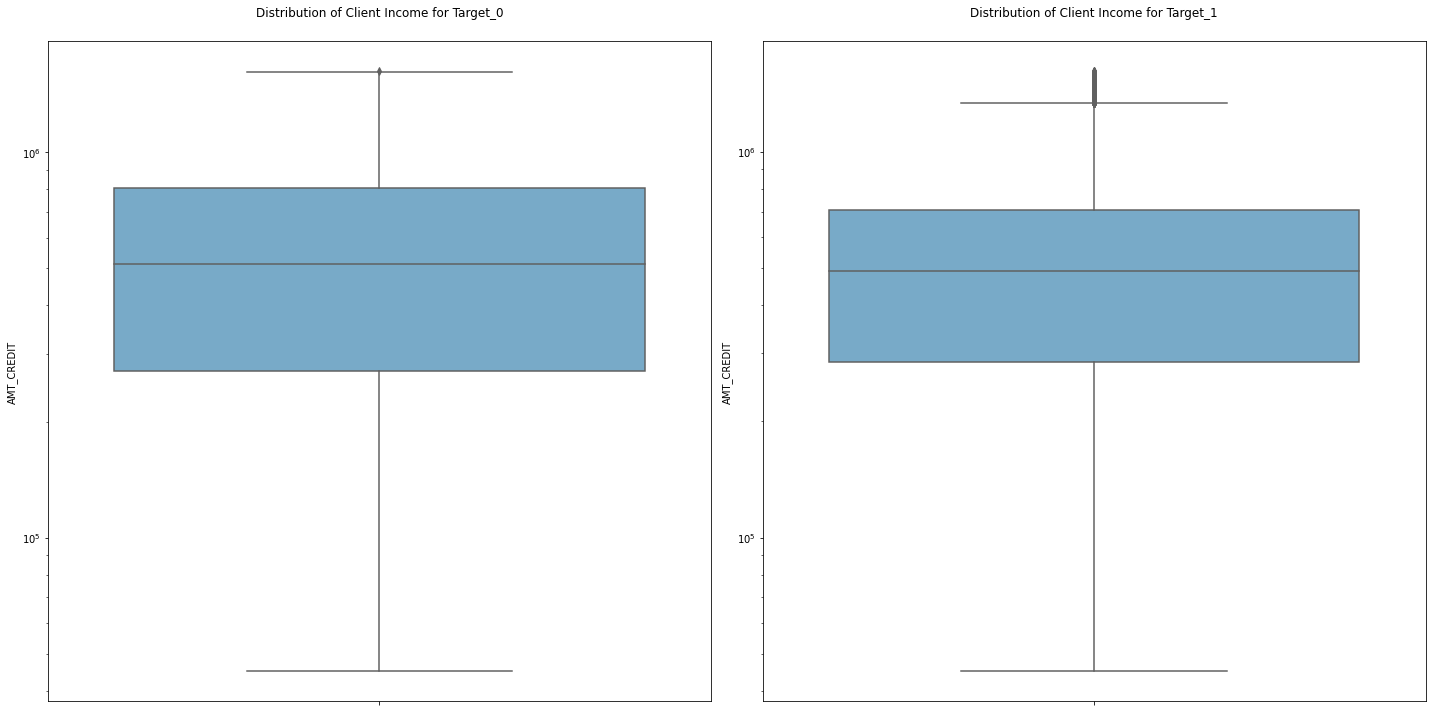

In [77]:
boxplot_uni_numerical(column_name='AMT_INCOME_TOTAL', title = 'Distribution of Client Income')

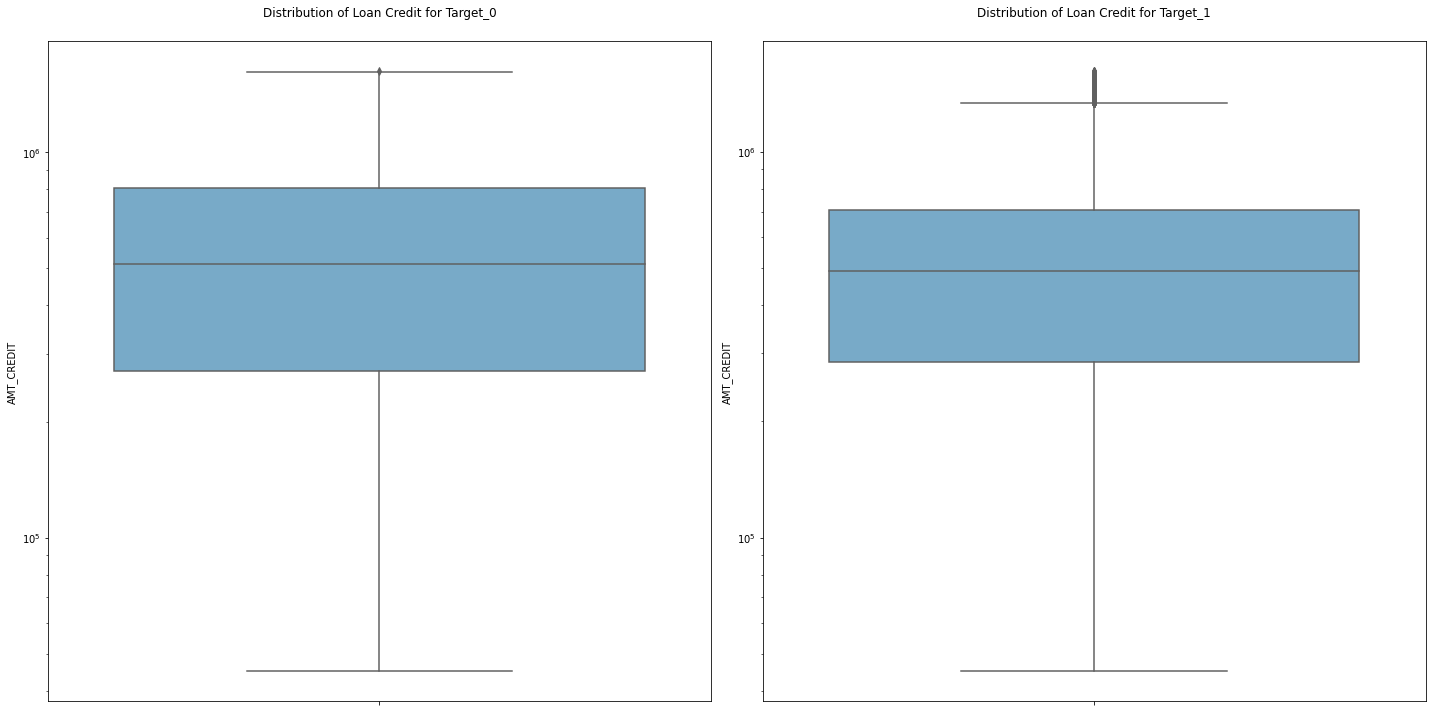

In [78]:
boxplot_uni_numerical(column_name='AMT_CREDIT', title = 'Distribution of Loan Credit')

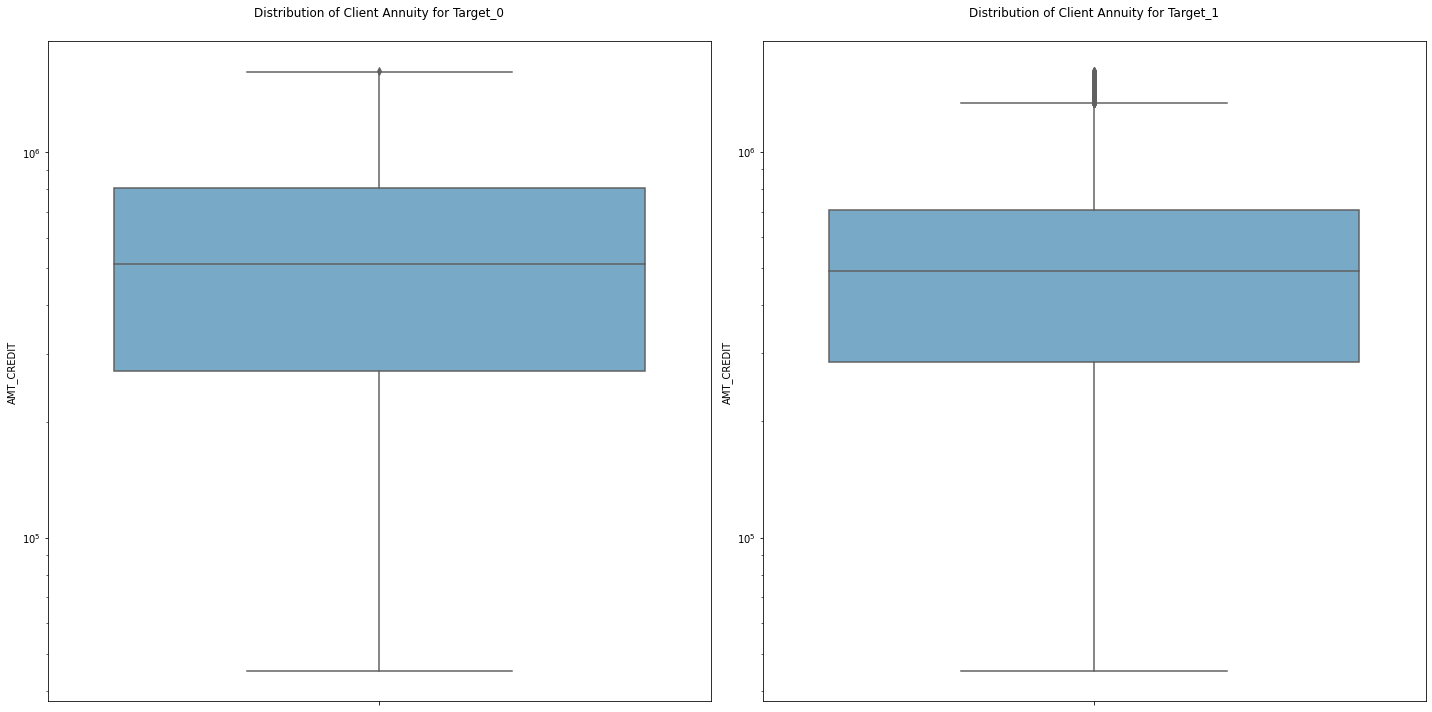

In [79]:
boxplot_uni_numerical(column_name='AMT_ANNUITY', title = 'Distribution of Client Annuity')

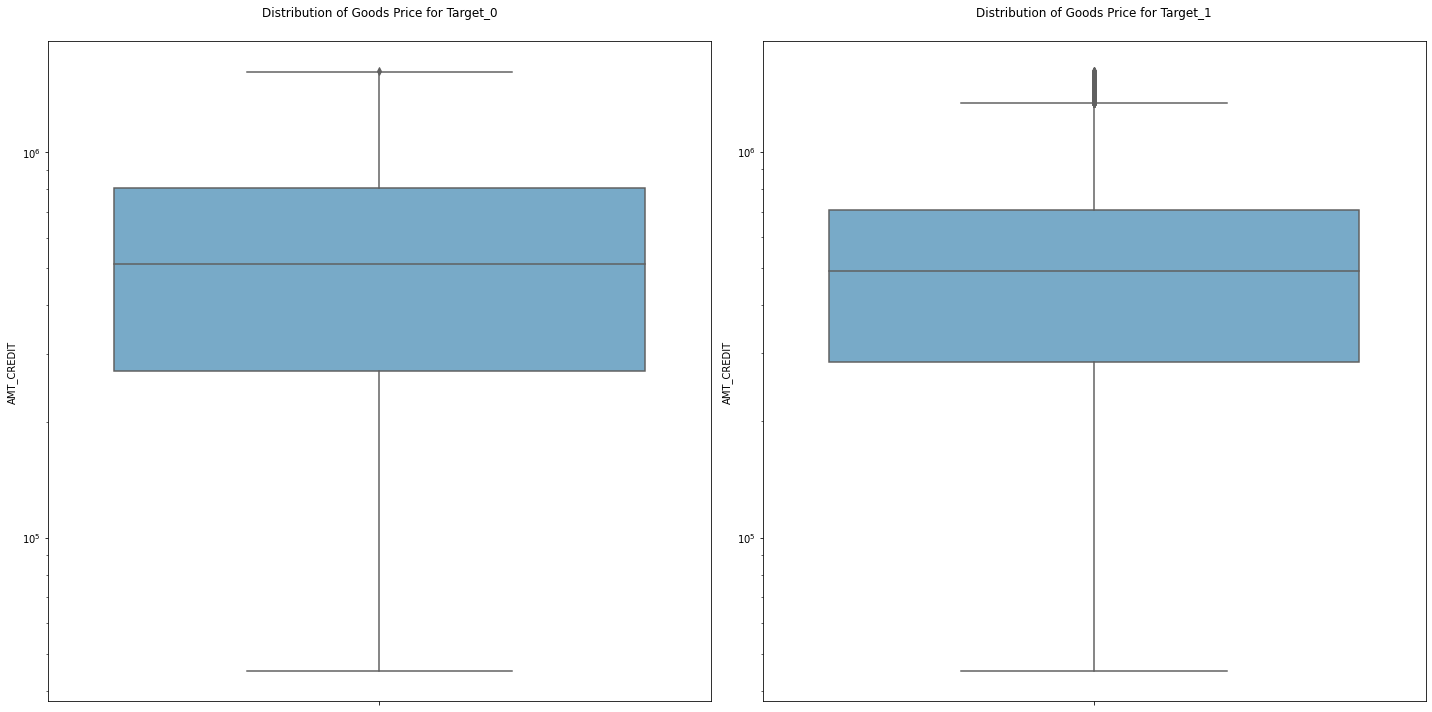

In [80]:
boxplot_uni_numerical(column_name='AMT_GOODS_PRICE', title = 'Distribution of Goods Price')

<b>From the above box plots:</b>

- People with target one has largely staggered income as compared to target zero. Box plot clearly shows that the shape in Income total, Annuity, Credit and Good Price are similar for Target 0 and similar for Target 1.

- The plots are also highlighting that people have difficulty in paying back loans with respect to their income, loan amount, price of Goods against which loan is procured, and Annuity.


In [81]:
# Defining a custom function to plot various distplots for different numerical variables of:

def distplot_uni_numerical(col_1,col_2):
    
    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.distplot(col_1, bins = 15, color='red')
    plt.xticks(rotation=90)
    plt.title("Target=0")

    plt.subplot(1,2,2)
    sns.distplot(col_2, bins = 15, color='red')
    plt.xticks(rotation=90)
    plt.title("Target=1")

    plt.tight_layout()
    plt.show()

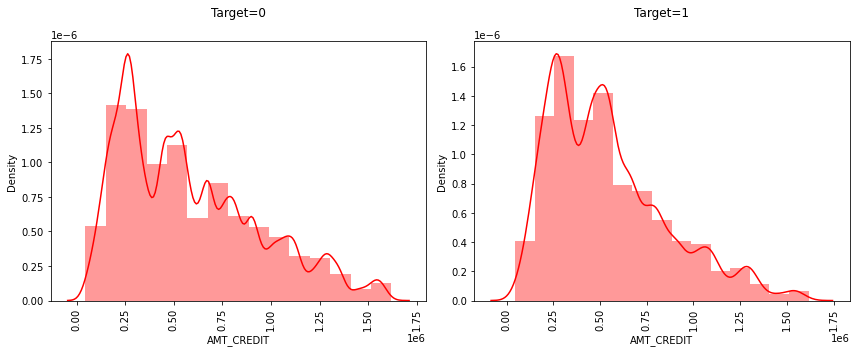

In [82]:
distplot_uni_numerical(target_0['AMT_CREDIT'],target_1['AMT_CREDIT'])

<b>The highest number of applicants apply for loans between Rs 2.5 Lac and Rs 5 Lac with some increase in applications at Rs 7.5 Lac whereas difficulty in paying ranges for applicants who have taken loan between Rs 2.5 Lac and Rs 7.5 Lac</b>

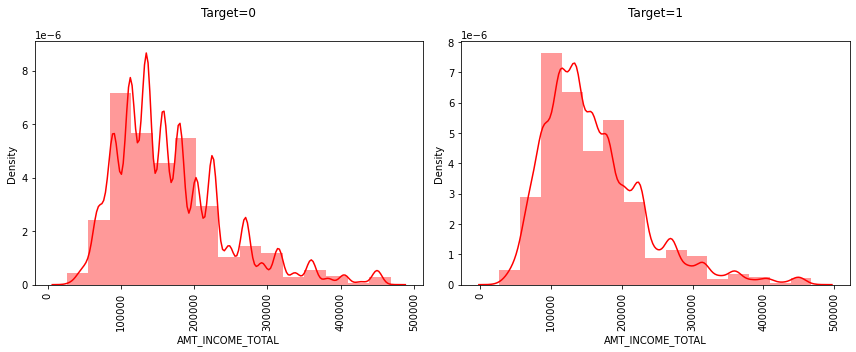

In [83]:
distplot_uni_numerical(target_0['AMT_INCOME_TOTAL'],target_1['AMT_INCOME_TOTAL'])

<b>Applicants who have income between Rs1 Lac and Rs 1.5 Lac are the one’s who apply for the loan in high number and are the same number of people who default in loan repayments.</b>

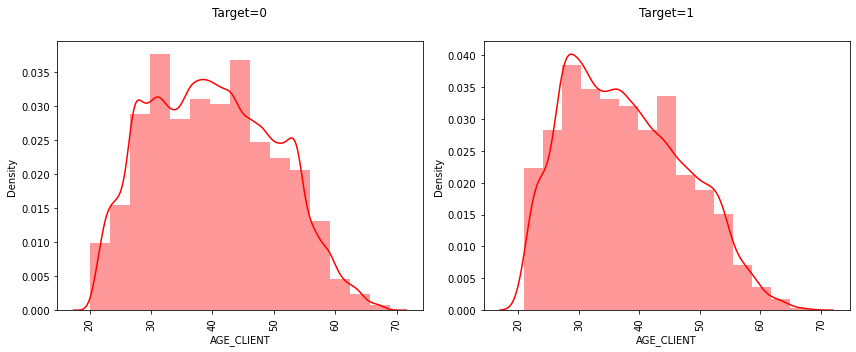

In [84]:
distplot_uni_numerical(target_0['AGE_CLIENT'],target_1['AGE_CLIENT'])

<b>The highest number of clients who apply for the loan are between the age of 30 and 50. Although the highest number of clients who tend to default in their repayment of the loan are in their mid- 20's.</b>

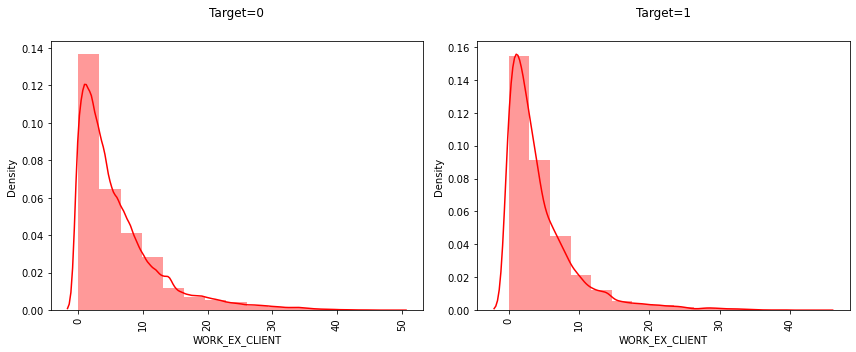

In [85]:
distplot_uni_numerical(target_0['WORK_EX_CLIENT'],target_1['WORK_EX_CLIENT'])

<b>The highest applicants are between 0-10 in work ex client and are the same who are most likely to default in the payments they make.</b>

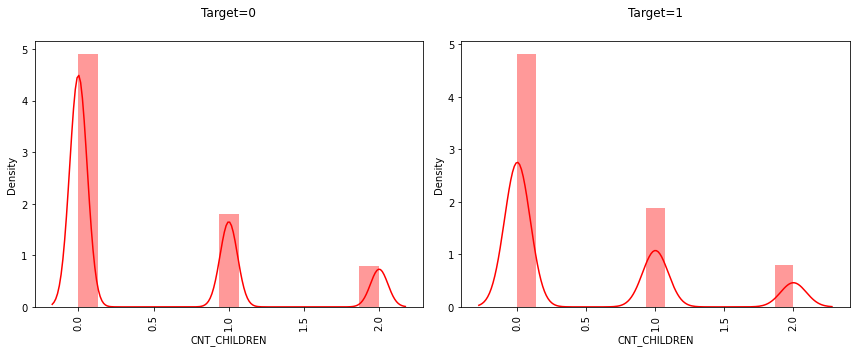

In [86]:
distplot_uni_numerical(target_0['CNT_CHILDREN'],target_1['CNT_CHILDREN'])

<b>The highest applications for loan are the ones who have no children and are the same who are likely to default on the payment of the loan.</b>

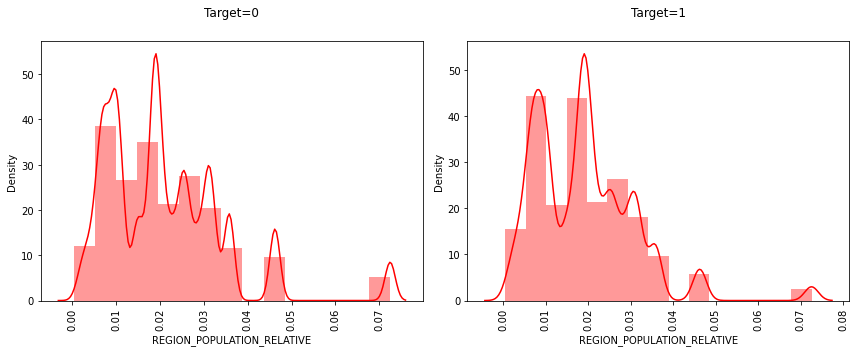

In [87]:
distplot_uni_numerical(target_0['REGION_POPULATION_RELATIVE'],target_1['REGION_POPULATION_RELATIVE'])

<b>Many applicants who stay in less populated areas have applied for a loan and the same can be defaulter for the loan since, in less populated area employability and wages are less as compare to high populated area.</b>

### 5.4 Bivariate Analysis of Numerical Variables of Current Application

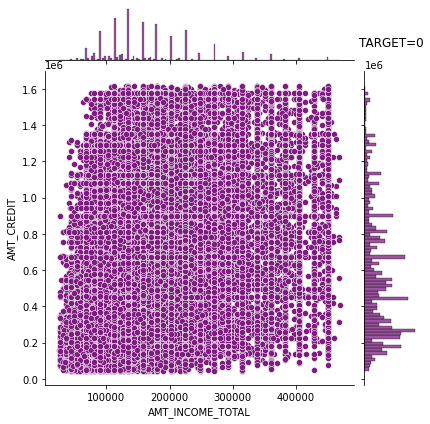

In [88]:
sns.jointplot('AMT_INCOME_TOTAL','AMT_CREDIT',target_0,kind='scatter',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

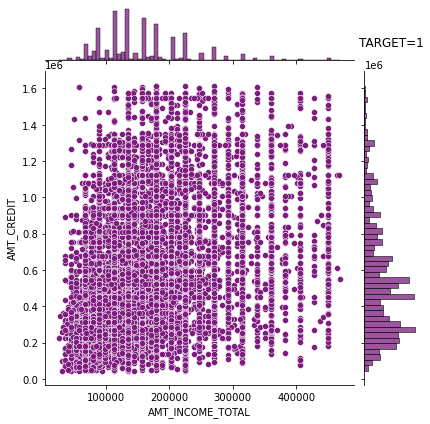

In [89]:
sns.jointplot('AMT_INCOME_TOTAL','AMT_CREDIT',target_1,kind='scatter',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

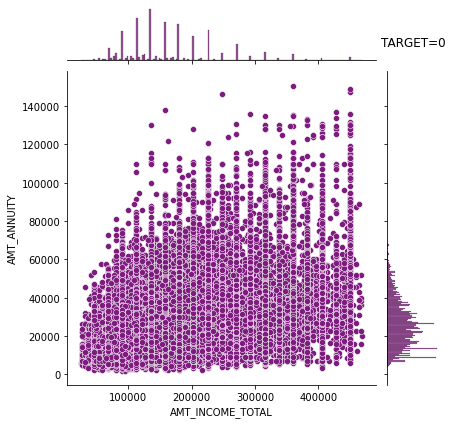

In [90]:
sns.jointplot('AMT_INCOME_TOTAL','AMT_ANNUITY',target_0,kind='scatter',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

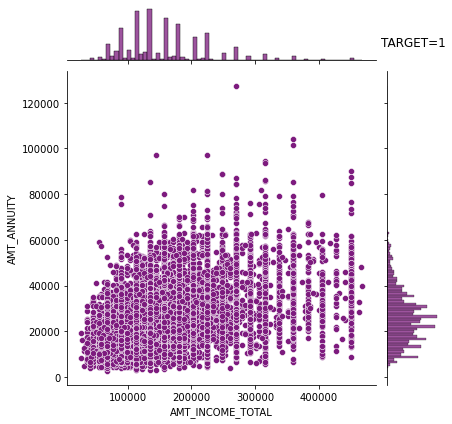

In [91]:
sns.jointplot('AMT_INCOME_TOTAL','AMT_ANNUITY',target_1,kind='scatter',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()


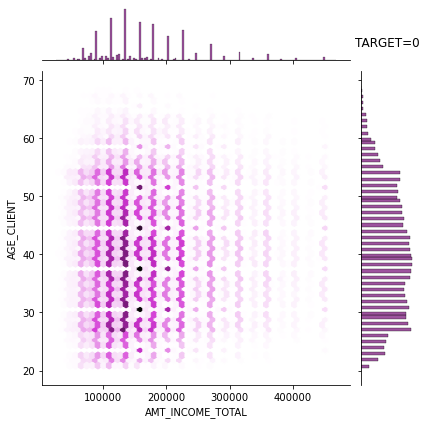

In [92]:
sns.jointplot('AMT_INCOME_TOTAL','AGE_CLIENT',target_0,kind='hex',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

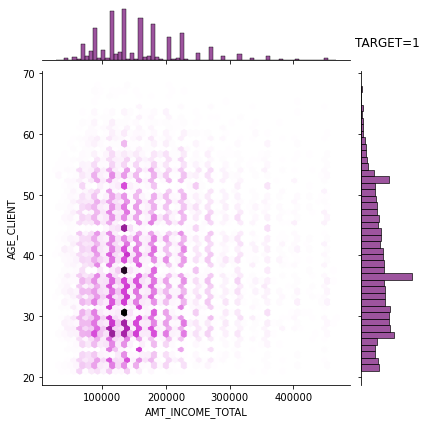

In [93]:
sns.jointplot('AMT_INCOME_TOTAL','AGE_CLIENT',target_1,kind='hex',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

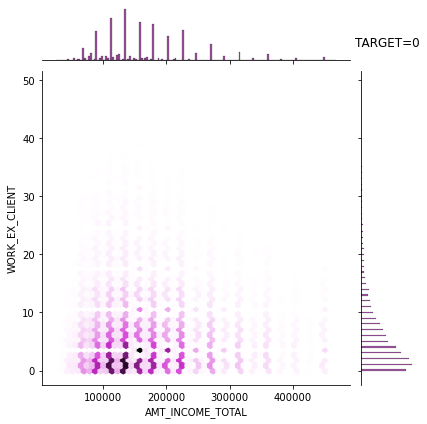

In [94]:
sns.jointplot('AMT_INCOME_TOTAL','WORK_EX_CLIENT',target_0,kind='hex',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

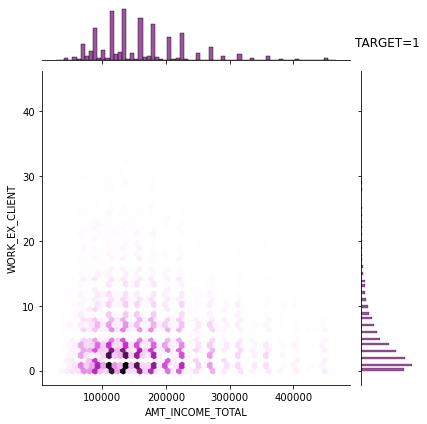

In [95]:
sns.jointplot('AMT_INCOME_TOTAL','WORK_EX_CLIENT',target_1,kind='hex',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

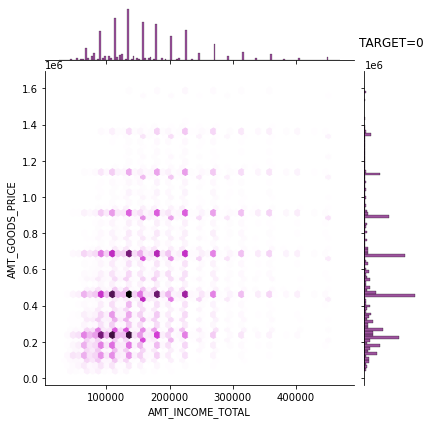

In [96]:
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE',target_0,kind='hex',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

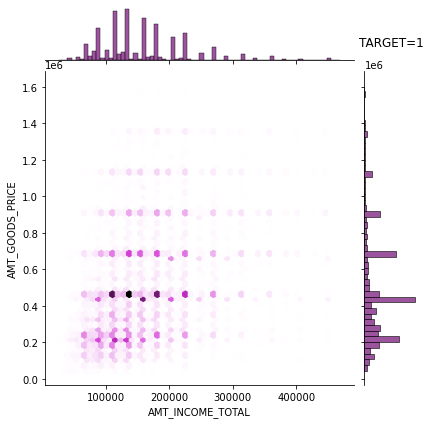

In [97]:
sns.jointplot('AMT_INCOME_TOTAL','AMT_GOODS_PRICE',target_1,kind='hex',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

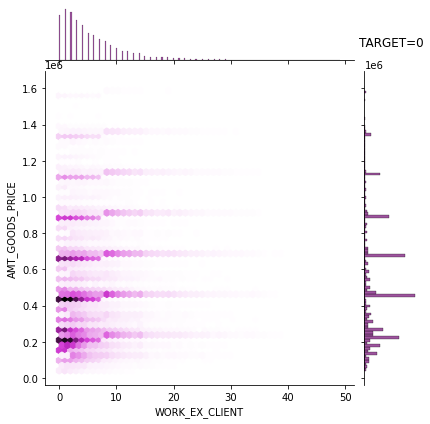

In [98]:
sns.jointplot('WORK_EX_CLIENT','AMT_GOODS_PRICE',target_0,kind='hex',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

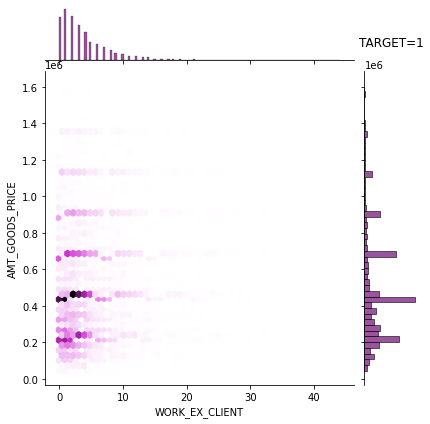

In [99]:
sns.jointplot('WORK_EX_CLIENT','AMT_GOODS_PRICE',target_1,kind='hex',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

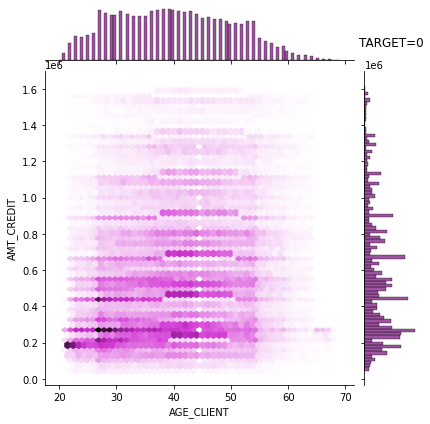

In [100]:
sns.jointplot('AGE_CLIENT','AMT_CREDIT',target_0,kind='hex',color="#7D1B7E")
plt.title("TARGET=0")
plt.show()

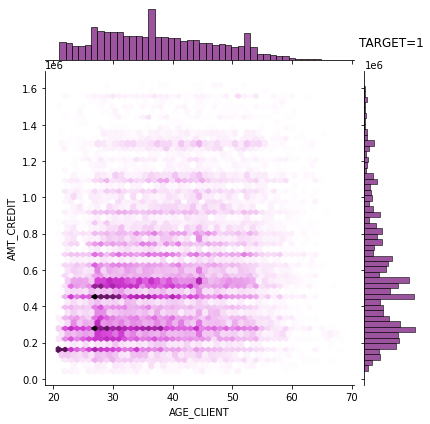

In [101]:
sns.jointplot('AGE_CLIENT','AMT_CREDIT',target_1,kind='hex',color="#7D1B7E")
plt.title("TARGET=1")
plt.show()

<b>From the above joint plots, our observations:</b>

- Applicants having income between Rs 1 Lac and Rs 2 Lac apply for double amount of loani.e. between Rs 2 Lac to Rs 4 Lac.

- Similarly applicants between loan amount of Rs 2 Lac to 4 Lac with income of Rs 1 Lac to Rs 2 Lac tend to default.

- Clients between the age of 20-50 apply for loan ranging between Rs 2 lac to Rs 4 Lac whereas defaults are more between the age of 35-40 for amount between Rs 4 Lac to Rs 6 Lac.

- On second number defaulters are between Rs 2 Lac and Rs 4 Lac & between age of 30-35.

### 5.5 Analysis of Categorical and Numerical Variables of Current Application

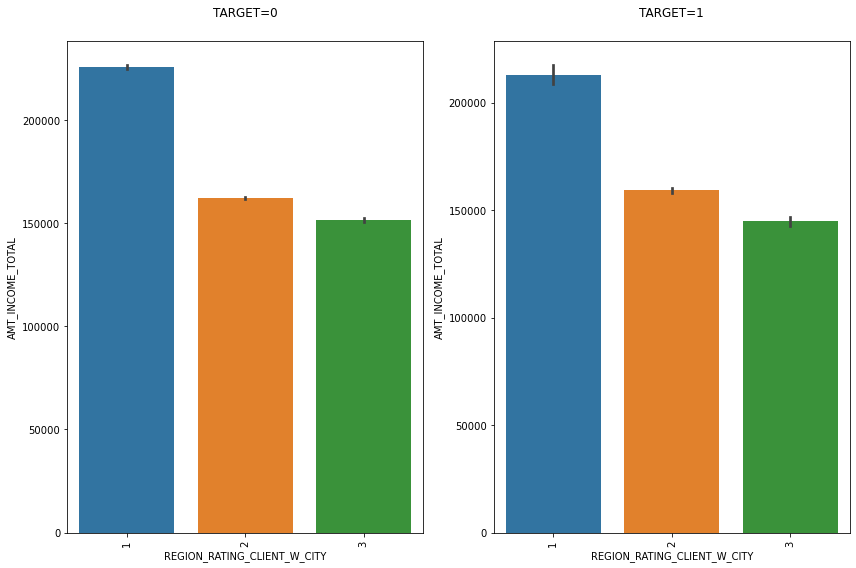

In [102]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x="REGION_RATING_CLIENT_W_CITY",y="AMT_INCOME_TOTAL",data=target_0)
plt.xticks(rotation=90)
plt.title("TARGET=0")

plt.subplot(1,2,2)
sns.barplot(x="REGION_RATING_CLIENT_W_CITY",y="AMT_INCOME_TOTAL",data=target_1)
plt.xticks(rotation=90)
plt.title("TARGET=1")

plt.tight_layout()
plt.show()

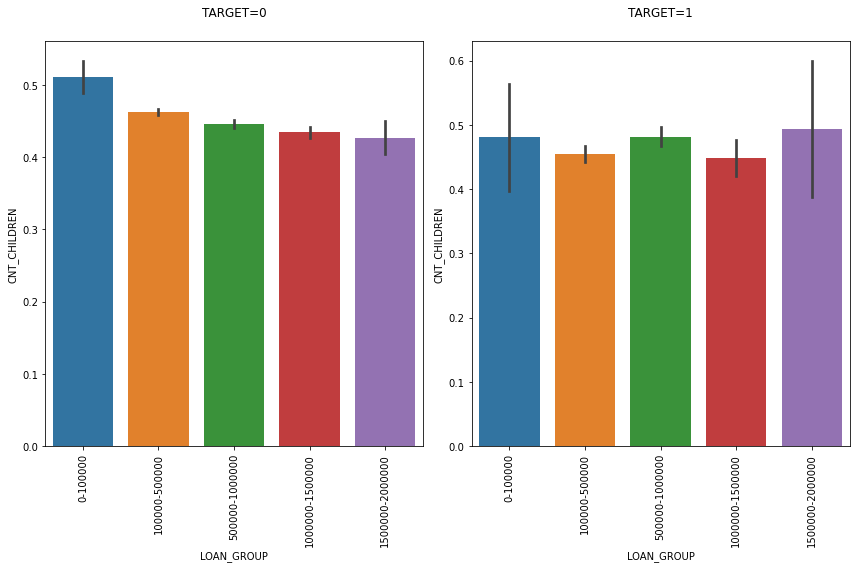

In [103]:
# We have considered barplots for a categorical- numerical analysis
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x="LOAN_GROUP",y="CNT_CHILDREN",data=target_0)
plt.xticks(rotation=90)
plt.title("TARGET=0")

plt.subplot(1,2,2)
sns.barplot(x="LOAN_GROUP",y="CNT_CHILDREN",data=target_1)
plt.xticks(rotation=90)
plt.title("TARGET=1")

plt.tight_layout()
plt.show()

In [104]:
# Defining a custom function to plot various countplots for different categorical and numerical variables:
def plot_cat_num_analysis(col1,col2,col3,col4,hue_order):
    plt.figure(figsize=(12,8))
    
      
    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25
    
    # 1st Plot
    plt.subplot(121)
    sns.countplot(x=col1, hue=col2, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.title('TARGET=0')
    
    # 2nd Plot
    plt.subplot(122)
    sns.countplot(x=col3, hue=col4, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.title('TARGET=1')
    plt.show()

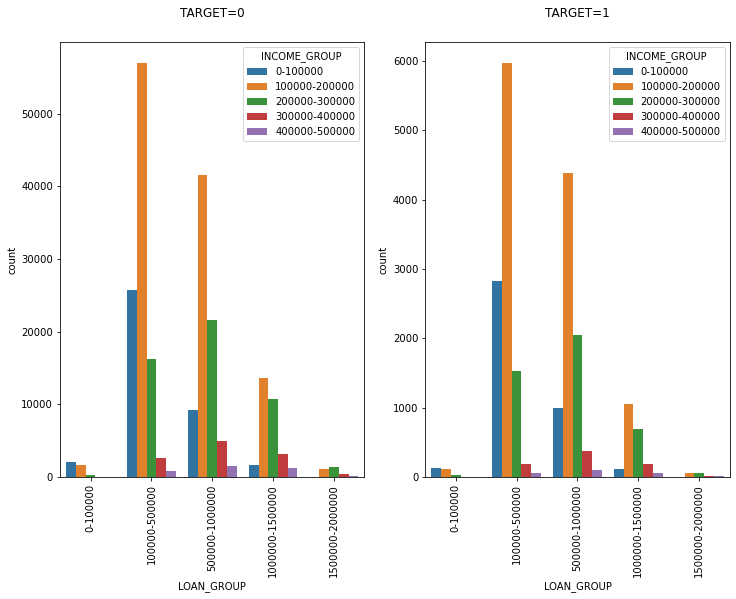

In [105]:
plot_cat_num_analysis(target_0['LOAN_GROUP'],target_0['INCOME_GROUP'],target_1['LOAN_GROUP'],target_1['INCOME_GROUP'],None)

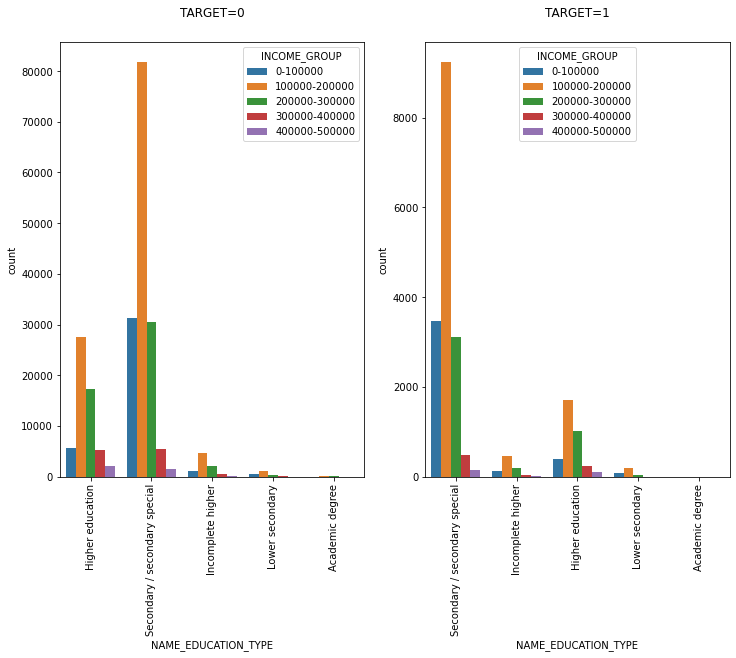

In [106]:
plot_cat_num_analysis(target_0['NAME_EDUCATION_TYPE'],target_0['INCOME_GROUP'],target_1['NAME_EDUCATION_TYPE'],target_1['INCOME_GROUP'],None)

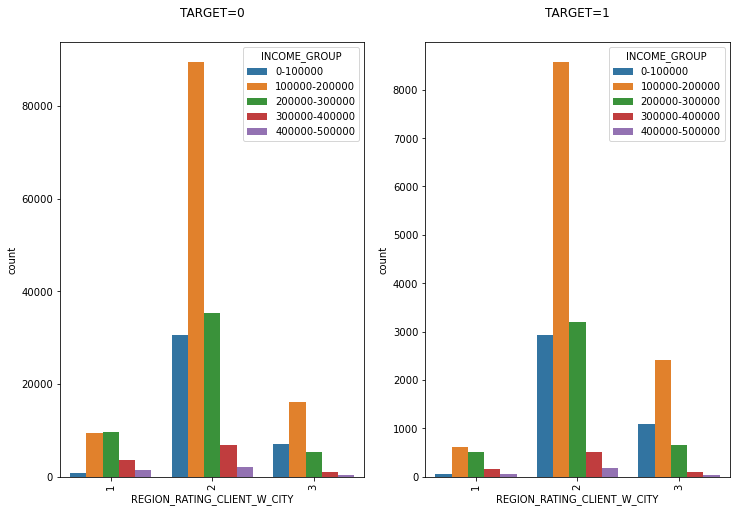

In [107]:
plot_cat_num_analysis(target_0['REGION_RATING_CLIENT_W_CITY'],target_0['INCOME_GROUP'],target_1['REGION_RATING_CLIENT_W_CITY'],target_1['INCOME_GROUP'],None)

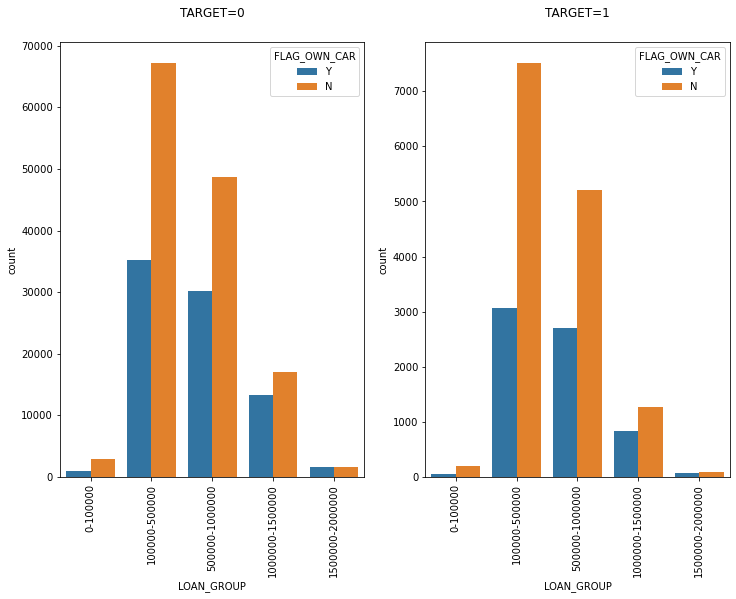

In [108]:
plot_cat_num_analysis(target_0['LOAN_GROUP'],target_0['FLAG_OWN_CAR'],target_1['LOAN_GROUP'],target_1['FLAG_OWN_CAR'],['Y','N'])

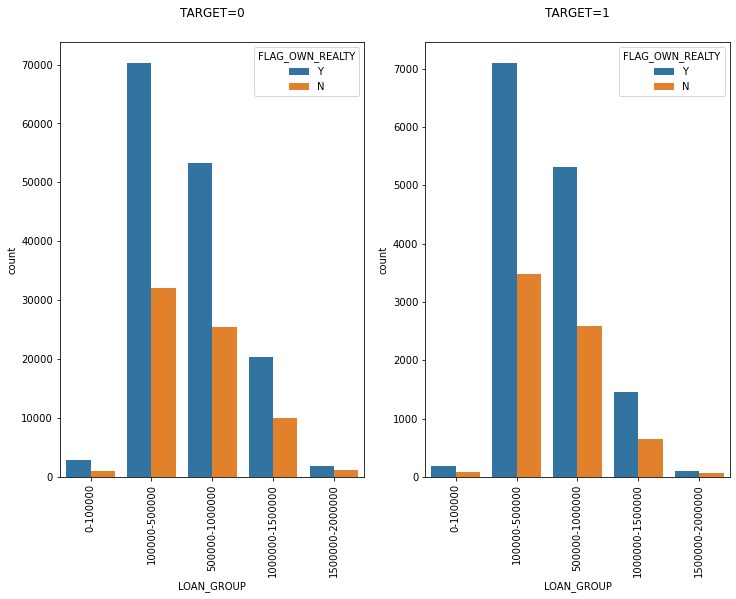

In [109]:
plot_cat_num_analysis(target_0['LOAN_GROUP'],target_0['FLAG_OWN_REALTY'],target_1['LOAN_GROUP'],target_1['FLAG_OWN_REALTY'],['Y','N'])

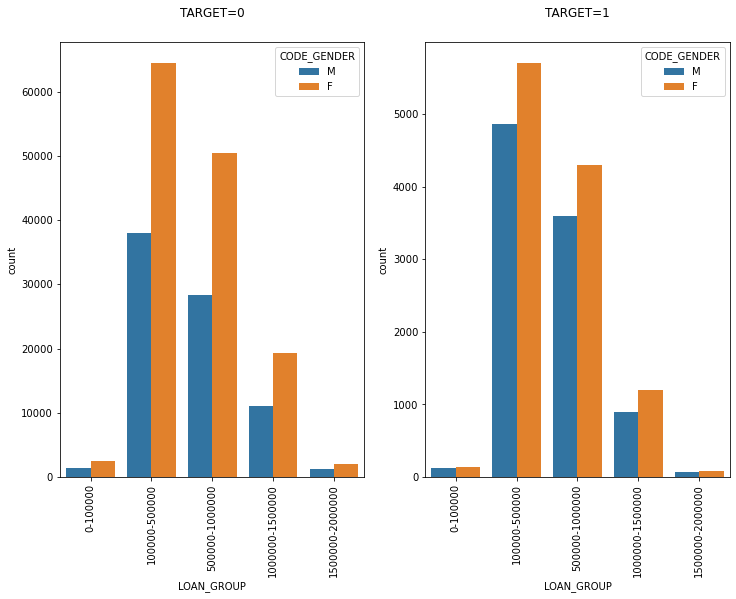

In [110]:
plot_cat_num_analysis(target_0['LOAN_GROUP'],target_0['CODE_GENDER'],target_1['LOAN_GROUP'],target_1['CODE_GENDER'], ['M','F'])

<b>Observations from above bar plots:</b>

- In Region rating, more clients apply for loan in city 1 as compared to 2 & 3 and default also in city 1 may be because of more application.

- In Loan group clients from with more children and less income apply for the loan where in defaults clients with high income and more children default.

- Here also the outcome is like previous analysis where flag own car, flag own realty and loan group have similar applications and defaulters

### 5.6 Multivariate Analysis of Target 0 and Target 1

In [111]:
# Correlation Matrix for Target_0 and Target_1

#We'll first make a custom list of all the numerical columns:
numerical_cols=list(target_1.select_dtypes(include= ['int64','float64']) )
numerical_cols

# We are removing SK_ID_CURR and TARGET since we will not be using them for our correlation.
numerical_cols.remove('SK_ID_CURR')
numerical_cols.remove('TARGET')

#We are going to remove the 'SK_ID_CURR' and the 'TARGET' columns.

#Corelation for numerical columns with Target=0
cor_0=target_0[numerical_cols].corr()
cor_1=target_1[numerical_cols].corr()

In [112]:
print('Correlation Matrix for Target_0')
print('\n')
cor_0

Correlation Matrix for Target_0




,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
CNT_CHILDREN,1.000000,-0.016375,-0.020431,-0.008819,-0.024529,-0.027933,-0.253211,-0.068234,-0.159897,0.116672,0.871535,0.034283,0.033384
AMT_INCOME_TOTAL,-0.016375,1.000000,0.350194,0.434438,0.356153,0.179525,0.048158,0.032531,-0.038854,0.032719,-0.009731,-0.210119,-0.229997
AMT_CREDIT,-0.020431,0.350194,1.000000,0.737342,0.983612,0.073124,0.155397,0.086816,0.022548,0.032894,0.040844,-0.075056,-0.082594
AMT_ANNUITY,-0.008819,0.434438,0.737342,1.000000,0.741638,0.096252,0.084263,0.046449,-0.007003,0.022625,0.044524,-0.109006,-0.121907
AMT_GOODS_PRICE,-0.024529,0.356153,0.983612,0.741638,1.000000,0.077783,0.149842,0.088543,0.019057,0.034678,0.039331,-0.076498,-0.083382
REGION_POPULATION_RELATIVE,-0.027933,0.179525,0.073124,0.096252,0.077783,1.000000,0.038376,-0.008758,0.059419,0.005397,-0.026794,-0.529496,-0.527656
AGE_CLIENT,-0.253211,0.048158,0.155397,0.084263,0.149842,0.038376,1.000000,0.353444,0.299788,0.112568,-0.177208,-0.033665,-0.033354
WORK_EX_CLIENT,-0.068234,0.032531,0.086816,0.046449,0.088543,-0.008758,0.353444,1.000000,0.174176,0.087327,-0.032439,0.017489,0.016338
YEARS_REGISTRATION,-0.159897,-0.038854,0.022548,-0.007003,0.019057,0.059419,0.299788,0.174176,1.000000,0.030999,-0.149981,-0.096067,-0.088561
YEARS_ID_PUBLISH,0.116672,0.032719,0.032894,0.022625,0.034678,0.005397,0.112568,0.087327,0.030999,1.000000,0.106045,-0.004552,-0.002466


In [113]:
print('Correlation Matrix for Target_1')
print('\n')
cor_1

Correlation Matrix for Target_1




,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
CNT_CHILDREN,1.000000,-0.022042,-0.000025,0.019298,-0.006383,-0.030457,-0.189976,-0.035059,-0.120118,0.085448,0.868061,0.042669,0.044207
AMT_INCOME_TOTAL,-0.022042,1.000000,0.328407,0.404923,0.332801,0.111964,0.093620,0.026795,-0.005440,0.041177,-0.015345,-0.167463,-0.183997
AMT_CREDIT,-0.000025,0.328407,1.000000,0.727843,0.979764,0.069567,0.190357,0.113054,0.039078,0.061472,0.055452,-0.055638,-0.068005
AMT_ANNUITY,0.019298,0.404923,0.727843,1.000000,0.729309,0.070064,0.080984,0.047068,-0.012142,0.039736,0.062037,-0.067608,-0.084265
AMT_GOODS_PRICE,-0.006383,0.332801,0.979764,0.729309,1.000000,0.078665,0.186330,0.119223,0.038446,0.064657,0.052332,-0.064579,-0.075726
REGION_POPULATION_RELATIVE,-0.030457,0.111964,0.069567,0.070064,0.078665,1.000000,0.049140,0.016387,0.056996,0.012186,-0.028950,-0.439031,-0.443306
AGE_CLIENT,-0.189976,0.093620,0.190357,0.080984,0.186330,0.049140,1.000000,0.307860,0.240583,0.137524,-0.110600,-0.045436,-0.044012
WORK_EX_CLIENT,-0.035059,0.026795,0.113054,0.047068,0.119223,0.016387,0.307860,1.000000,0.139015,0.097480,0.003287,-0.005089,-0.002023
YEARS_REGISTRATION,-0.120118,-0.005440,0.039078,-0.012142,0.038446,0.056996,0.240583,0.139015,1.000000,0.051979,-0.115271,-0.113420,-0.108190
YEARS_ID_PUBLISH,0.085448,0.041177,0.061472,0.039736,0.064657,0.012186,0.137524,0.097480,0.051979,1.000000,0.082720,-0.006096,-0.002687


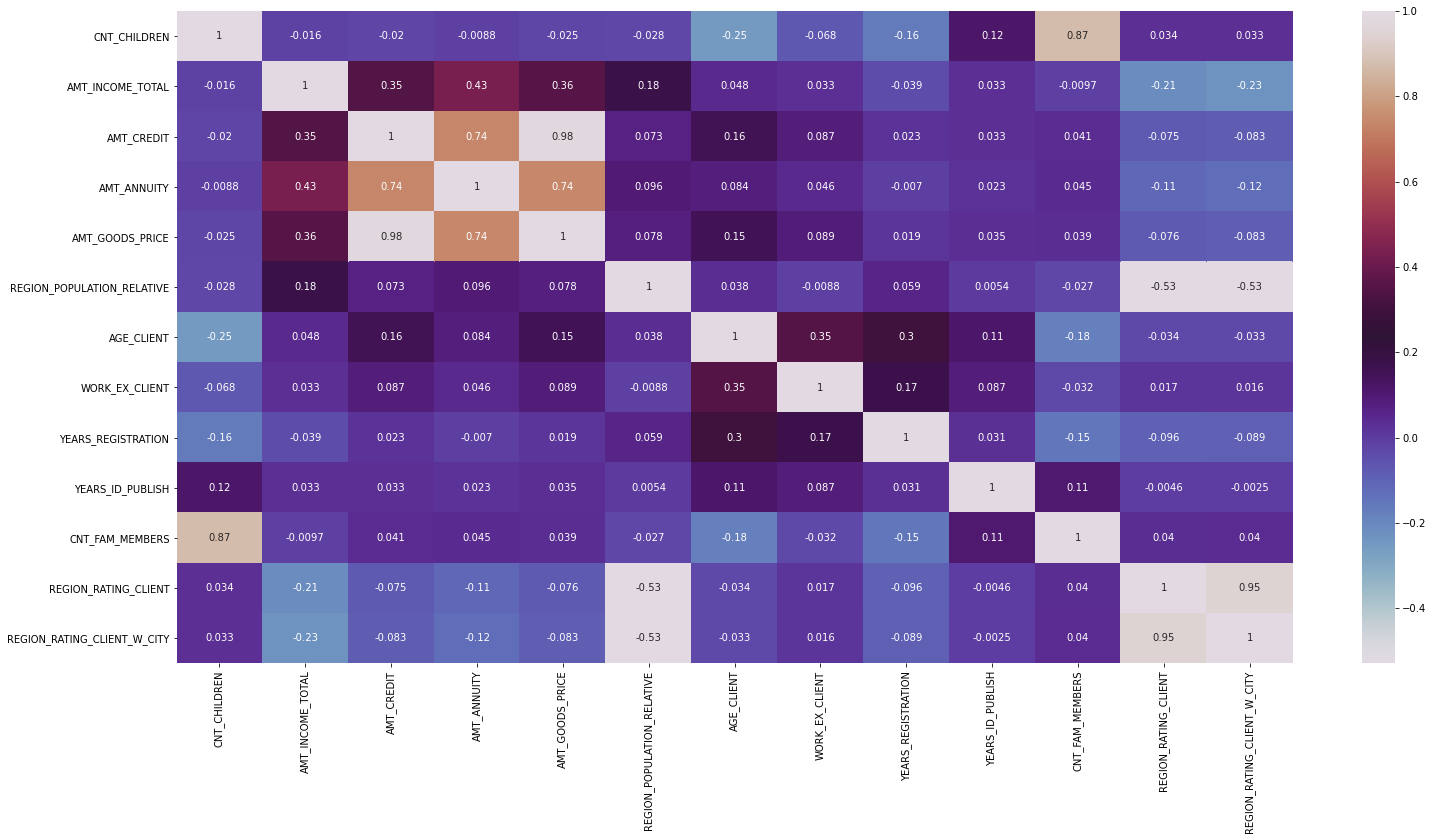

In [114]:
#We will be using a heatmap to visualize the correlation
# heatmap for target variable = 0

plt.figure(figsize=(25,12))
sns.heatmap(cor_0, cmap="twilight", annot=True)

plt.show()

In [115]:
# Top 10 Correlation for target_0:
corr_mat=cor_0
corr=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
corr.dropna(subset=['CORR'],inplace=True)
corr.sort_values(['CORR'],ascending=False,ignore_index = True,axis=0,inplace=True)
corr.head(10)

,VAR1,VAR2,CORR
0,AMT_GOODS_PRICE,AMT_CREDIT,0.983612
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949003
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.871535
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.741638
4,AMT_ANNUITY,AMT_CREDIT,0.737342
5,AMT_ANNUITY,AMT_INCOME_TOTAL,0.434438
6,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.356153
7,WORK_EX_CLIENT,AGE_CLIENT,0.353444
8,AMT_CREDIT,AMT_INCOME_TOTAL,0.350194
9,YEARS_REGISTRATION,AGE_CLIENT,0.299788


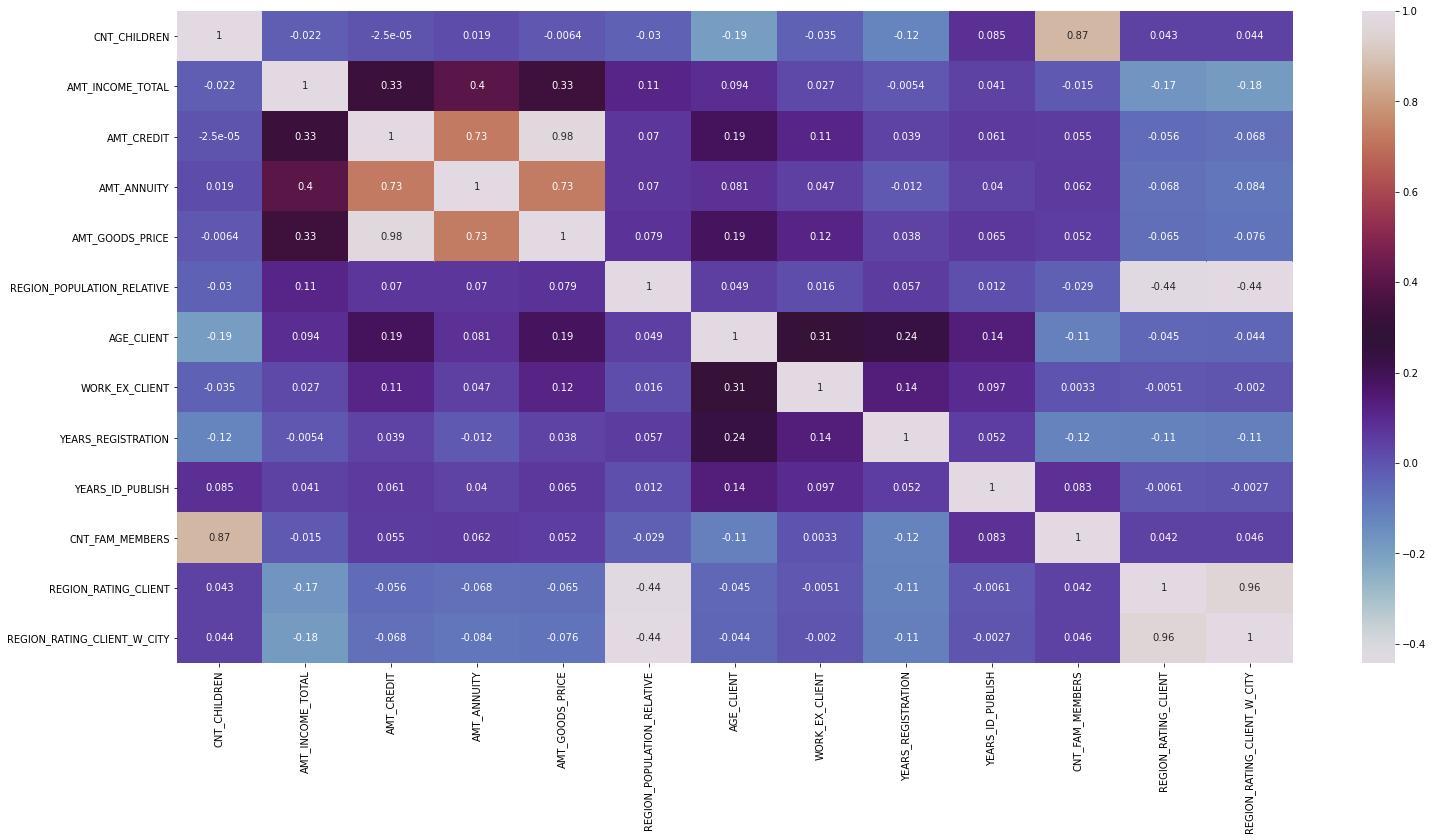

In [116]:
# heatmap for target variable = 1

plt.figure(figsize=(25,12))
sns.heatmap(cor_1, cmap="twilight", annot=True)

plt.show()

In [117]:
# Top 10 Correlation for target_1:
corr_mat=cor_1
corr=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
corr.dropna(subset=['CORR'],inplace=True)
corr.sort_values(['CORR'],ascending=False,ignore_index = True,axis=0,inplace=True)
corr.head(10)

,VAR1,VAR2,CORR
0,AMT_GOODS_PRICE,AMT_CREDIT,0.979764
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956614
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.868061
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.729309
4,AMT_ANNUITY,AMT_CREDIT,0.727843
5,AMT_ANNUITY,AMT_INCOME_TOTAL,0.404923
6,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.332801
7,AMT_CREDIT,AMT_INCOME_TOTAL,0.328407
8,WORK_EX_CLIENT,AGE_CLIENT,0.307860
9,YEARS_REGISTRATION,AGE_CLIENT,0.240583


#### Observation from above two correlation:

<b>Correlation of AMT_GOODS_Price is highish correlated with AMT_Credit and CNT_FAM_MEMBERS is strong with CNT_CHILDREN in Target 0.Region client with city is closely correlated with region rating client in both Target audience.

The amount of loan taken out is proportional to the value of the goods that is bought using the loan with the minor difference indicating personal finance also being put in or a limit set for the amount by the lender.
 

Amt_crdit is inversly propertional to count of children, i.e. credit amount is higher for young age and less number of children or low dependent.
    
Work Experience of client is relational to age of client    
    
                                                                      (Disclaimer : correlation does not imply causation)

## 6. Merging Current Application and Previous Application

In [118]:
merged_appl = pd.merge(left = fnl_curr_appl, right=prev_appl, how='inner', on='SK_ID_CURR', suffixes='_o')

In [119]:
merged_appl.head()

,SK_ID_CURR,TARGET,INCOME_GROUP,LOAN_GROUP,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE_CLIENT,WORK_EX_CLIENT,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPEo,AMT_ANNUITYo,AMT_APPLICATION,AMT_CREDITo,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEo,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEo,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,200000-300000,100000-500000,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,Business Entity Type 3,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,200000-300000,1000000-1500000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,School,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,200000-300000,1000000-1500000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,School,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,200000-300000,1000000-1500000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,School,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,0-100000,100000-500000,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,Government,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [120]:
merged_appl.shape

(1090399, 64)

In [121]:
merged_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090399 entries, 0 to 1090398
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1090399 non-null  int64   
 1   TARGET                       1090399 non-null  int64   
 2   INCOME_GROUP                 1090399 non-null  category
 3   LOAN_GROUP                   1090399 non-null  category
 4   NAME_CONTRACT_TYPE_          1090399 non-null  object  
 5   CODE_GENDER                  1090399 non-null  object  
 6   FLAG_OWN_CAR                 1090399 non-null  object  
 7   FLAG_OWN_REALTY              1090399 non-null  object  
 8   CNT_CHILDREN                 1090399 non-null  int64   
 9   AMT_INCOME_TOTAL             1090399 non-null  float64 
 10  AMT_CREDIT_                  1090399 non-null  float64 
 11  AMT_ANNUITY_                 1090306 non-null  float64 
 12  AMT_GOODS_PRICE_            

In [122]:
# Removing Unwanted columns
merged_appl.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION'],axis=1,inplace=True)          

In [123]:
merged_appl.shape

(1090399, 51)

In [124]:
# Renaming the col
merged_appl = merged_appl.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','NAME_TYPE_SUITE_':'NAME_TYPE_SUITE','NAME_CONTRACT_TYPEo':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITo':'AMT_CREDIT_PREV','AMT_ANNUITYo':'AMT_ANNUITY_PREV','AMT_GOODS_PRICEo':'AMT_GOODS_PRICE_PREV', 'NAME_TYPE_SUITEo':'NAME_TYPE_SUITE_PREV'}, axis=1)
                 

In [125]:

merged_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090399 entries, 0 to 1090398
Data columns (total 51 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1090399 non-null  int64   
 1   TARGET                       1090399 non-null  int64   
 2   INCOME_GROUP                 1090399 non-null  category
 3   LOAN_GROUP                   1090399 non-null  category
 4   NAME_CONTRACT_TYPE           1090399 non-null  object  
 5   CODE_GENDER                  1090399 non-null  object  
 6   FLAG_OWN_CAR                 1090399 non-null  object  
 7   FLAG_OWN_REALTY              1090399 non-null  object  
 8   CNT_CHILDREN                 1090399 non-null  int64   
 9   AMT_INCOME_TOTAL             1090399 non-null  float64 
 10  AMT_CREDIT                   1090399 non-null  float64 
 11  AMT_ANNUITY                  1090306 non-null  float64 
 12  AMT_GOODS_PRICE             

In [126]:
# Checking to see null values in the merged dataframe

null_col_2 = merged_appl.isnull().mean()*100
null_col_2.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.604640
RATE_INTEREST_PRIMARY          99.604640
AMT_DOWN_PAYMENT               51.377248
RATE_DOWN_PAYMENT              51.377248
NAME_TYPE_SUITE_PREV           49.553054
NFLAG_INSURED_ON_APPROVAL      39.692810
DAYS_LAST_DUE                  39.692810
DAYS_LAST_DUE_1ST_VERSION      39.692810
DAYS_FIRST_DUE                 39.692810
DAYS_FIRST_DRAWING             39.692810
DAYS_TERMINATION               39.692810
AMT_GOODS_PRICE_PREV           22.221957
AMT_ANNUITY_PREV               21.471223
OCCUPATION_TYPE                16.132260
NAME_TYPE_SUITE                 0.156365
AMT_ANNUITY                     0.008529
FLAG_OWN_CAR                    0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
TARGET                          0.000000
AMT_GOODS_PRICE                 0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
AMT_INCOME_TOTAL

In [127]:
# Check to see all the categorical variables have sound data:

for d in merged_appl.columns:
    print("\n" + d)
    print('-'*30)
    print(merged_appl[d].value_counts())


SK_ID_CURR
------------------------------
265681    73
173680    72
389950    64
382179    64
198355    63
          ..
224985     1
444833     1
284714     1
455078     1
243081     1
Name: SK_ID_CURR, Length: 227691, dtype: int64

TARGET
------------------------------
0    987891
1    102508
Name: TARGET, dtype: int64

INCOME_GROUP
------------------------------
100000-200000    571841
200000-300000    274583
0-100000         164886
300000-400000     60656
400000-500000     18433
Name: INCOME_GROUP, dtype: int64

LOAN_GROUP
------------------------------
100000-500000      514083
500000-1000000     397216
1000000-1500000    144127
0-100000            21688
1500000-2000000     13285
Name: LOAN_GROUP, dtype: int64

NAME_CONTRACT_TYPE
------------------------------
Cash loans         1002542
Revolving loans      87857
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER
------------------------------
F    693988
M    396411
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR
-----------------

2    829719
3    150319
1    110361
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

ORGANIZATION_TYPE
------------------------------
Business Entity Type 3    290579
Self-employed             176654
Other                      70125
Medicine                   49782
Business Entity Type 2     44672
Government                 43725
School                     37160
Trade: type 7              35831
Kindergarten               29906
Construction               28392
Business Entity Type 1     24266
Transport: type 4          23523
Security                   15119
Industry: type 3           14767
Industry: type 9           13672
Trade: type 3              13259
Housing                    13168
Industry: type 11          11712
Military                   10741
Trade: type 2              10619
Agriculture                10200
Bank                       10107
Postal                      9673
Police                      9590
Transport: type 2           8840
Restaurant                  7995
Security

Cash through the bank                        680721
XNA                                          403568
Non-cash from your account                     5392
Cashless from the account of the employer       718
Name: NAME_PAYMENT_TYPE, dtype: int64

CODE_REJECT_REASON
------------------------------
XAP       877335
HC        109379
LIMIT      39315
SCO        27389
CLIENT     19998
SCOFR      10369
XNA         3466
VERIF       2598
SYSTEM       550
Name: CODE_REJECT_REASON, dtype: int64

NAME_TYPE_SUITE_PREV
------------------------------
Unaccompanied      322582
Family             139309
Spouse, partner     47790
Children            19294
Other_B             12611
Other_A              6915
Group of people      1572
Name: NAME_TYPE_SUITE_PREV, dtype: int64

NAME_CLIENT_TYPE
------------------------------
Repeater     793391
New          205726
Refreshed     90115
XNA            1167
Name: NAME_CLIENT_TYPE, dtype: int64

DAYS_FIRST_DRAWING
------------------------------
 365243.0    61310

<b> We have a lot of rows which hace XAP and XAN values. This is important to keep as it helps organization to collect data, as a feedback company should imporve database collection method.</b>

In [128]:
#Reviewing merged_appl statistics:

merged_appl.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1090399.0,2.785012e+05,102838.137617,1.000020e+05,1.893270e+05,2.789500e+05,3.676050e+05,4.562550e+05
TARGET,1090399.0,9.400962e-02,0.291842,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CNT_CHILDREN,1090399.0,4.467695e-01,0.677814,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
AMT_INCOME_TOTAL,1090399.0,1.730369e+05,76428.224309,2.565000e+04,1.125000e+05,1.575000e+05,2.160000e+05,4.680000e+05
AMT_CREDIT,1090399.0,5.739639e+05,347231.304528,4.500000e+04,2.779695e+05,5.084955e+05,7.923465e+05,1.618767e+06
AMT_ANNUITY,1090306.0,2.706563e+04,13216.856847,1.980000e+03,1.720800e+04,2.551500e+04,3.457800e+04,1.507590e+05
AMT_GOODS_PRICE,1090399.0,5.143096e+05,317398.534730,4.050000e+04,2.430000e+05,4.500000e+05,6.795000e+05,1.615500e+06
REGION_POPULATION_RELATIVE,1090399.0,2.058097e-02,0.013071,2.900000e-04,1.003200e-02,1.885000e-02,2.639200e-02,7.250800e-02
AGE_CLIENT,1090399.0,4.054746e+01,10.012871,2.000000e+01,3.200000e+01,4.000000e+01,4.800000e+01,6.900000e+01
WORK_EX_CLIENT,1090399.0,6.207290e+00,6.356477,0.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,4.900000e+01


In [129]:
# From the above statistics, we see 'DAYS_DECISION' has negative values which cannot be the case. Hence, it makes sense to take absolute values of it:

merged_appl['DAYS_DECISION']=merged_appl['DAYS_DECISION'].abs()
merged_appl.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1090399.0,2.785012e+05,102838.137617,1.000020e+05,1.893270e+05,2.789500e+05,3.676050e+05,4.562550e+05
TARGET,1090399.0,9.400962e-02,0.291842,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CNT_CHILDREN,1090399.0,4.467695e-01,0.677814,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
AMT_INCOME_TOTAL,1090399.0,1.730369e+05,76428.224309,2.565000e+04,1.125000e+05,1.575000e+05,2.160000e+05,4.680000e+05
AMT_CREDIT,1090399.0,5.739639e+05,347231.304528,4.500000e+04,2.779695e+05,5.084955e+05,7.923465e+05,1.618767e+06
AMT_ANNUITY,1090306.0,2.706563e+04,13216.856847,1.980000e+03,1.720800e+04,2.551500e+04,3.457800e+04,1.507590e+05
AMT_GOODS_PRICE,1090399.0,5.143096e+05,317398.534730,4.050000e+04,2.430000e+05,4.500000e+05,6.795000e+05,1.615500e+06
REGION_POPULATION_RELATIVE,1090399.0,2.058097e-02,0.013071,2.900000e-04,1.003200e-02,1.885000e-02,2.639200e-02,7.250800e-02
AGE_CLIENT,1090399.0,4.054746e+01,10.012871,2.000000e+01,3.200000e+01,4.000000e+01,4.800000e+01,6.900000e+01
WORK_EX_CLIENT,1090399.0,6.207290e+00,6.356477,0.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,4.900000e+01


In [130]:
merged_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090399 entries, 0 to 1090398
Data columns (total 51 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1090399 non-null  int64   
 1   TARGET                       1090399 non-null  int64   
 2   INCOME_GROUP                 1090399 non-null  category
 3   LOAN_GROUP                   1090399 non-null  category
 4   NAME_CONTRACT_TYPE           1090399 non-null  object  
 5   CODE_GENDER                  1090399 non-null  object  
 6   FLAG_OWN_CAR                 1090399 non-null  object  
 7   FLAG_OWN_REALTY              1090399 non-null  object  
 8   CNT_CHILDREN                 1090399 non-null  int64   
 9   AMT_INCOME_TOTAL             1090399 non-null  float64 
 10  AMT_CREDIT                   1090399 non-null  float64 
 11  AMT_ANNUITY                  1090306 non-null  float64 
 12  AMT_GOODS_PRICE             

### 7. Analysis for Categorical Variables

In [131]:
# Let's define a custom function to see any emerging patterns with hue = Contract Status

def custom_countplot(column_name):
    plt.figure(figsize=(12,8))

    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25
    
    sns.countplot(data=merged_appl, y= column_name ,order=merged_appl[column_name].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
    plt.xticks(rotation=90)
    plt.xscale('log')

    plt.show()

# Let's define a custom function to see any emerging patterns with hue = Target

def custom_countplot_Target(column_name):
    plt.figure(figsize=(12,8))

    plt.rcParams["axes.labelsize"]= 10
    plt.rcParams['xtick.labelsize']= 10
    plt.rcParams['ytick.labelsize']= 10
    plt.rcParams['axes.titlesize']= 12
    plt.rcParams['axes.titleweight']= 10
    plt.rcParams['axes.titlepad']= 25

    sns.countplot(data=merged_appl, y= column_name, hue = 'TARGET')
    plt.xticks(rotation=90)
    plt.xscale('log')

    plt.show()

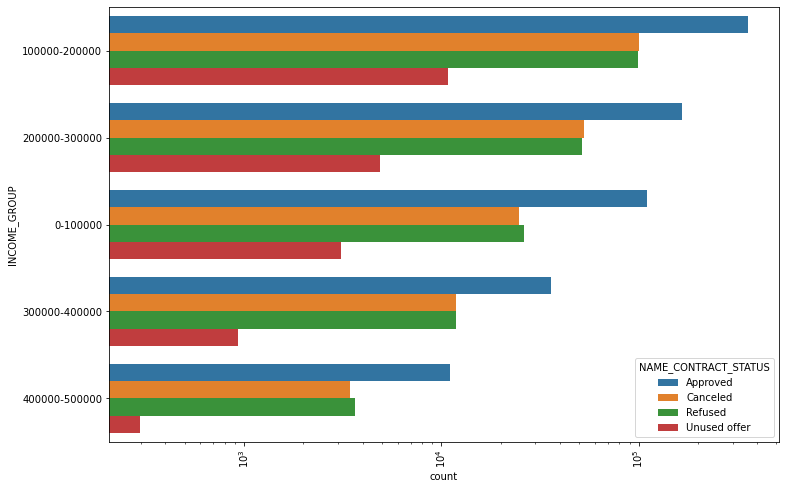

In [132]:
custom_countplot('INCOME_GROUP')

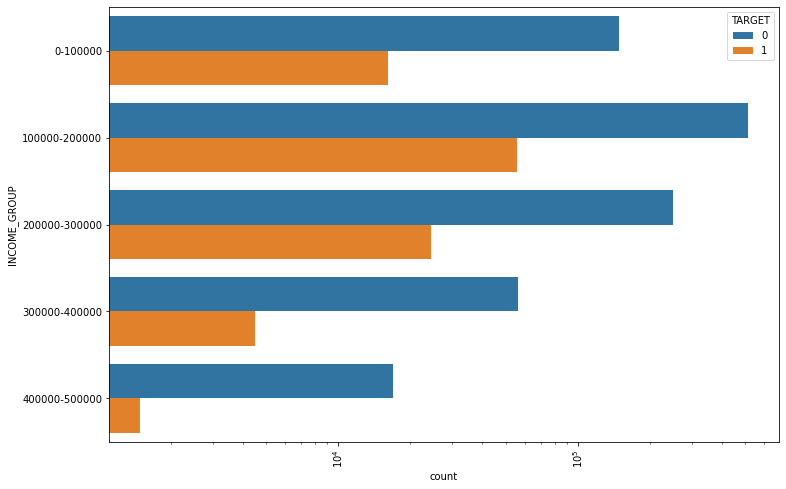

In [133]:
custom_countplot_Target('INCOME_GROUP')

- <b>Clients with income between Rs 1 Lac and Rs 2 Lac have the highest number of refused offers and equally high number of cancelled loans compared to others belonging to different Income groups.

- Those with payment difficulties are the highest in number for income group between Rs 1 Lac and Rs 2 Lac and lowest for income group between Rs 4 Lac and Rs 5 Lac.</b>

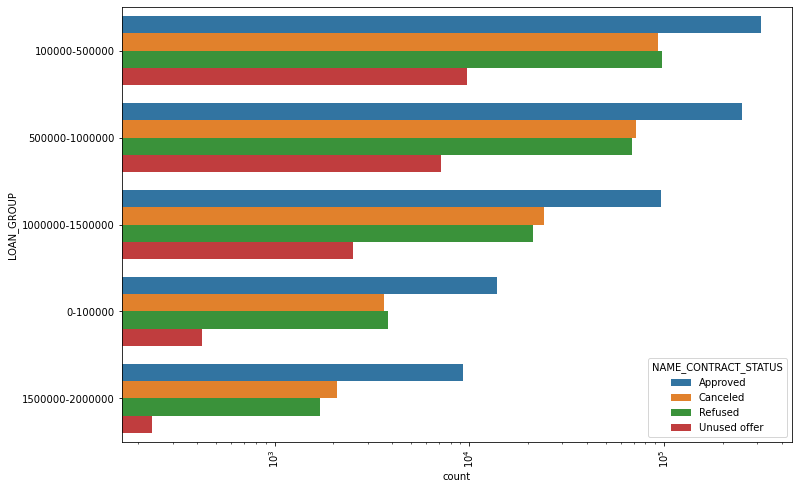

In [134]:
custom_countplot('LOAN_GROUP')

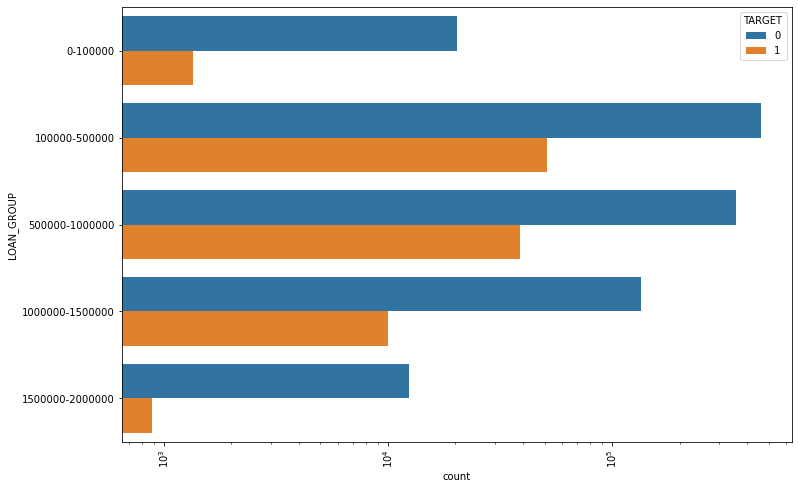

In [135]:
custom_countplot_Target('LOAN_GROUP')

- <b>Clients with highest loan requirement along with similar income group faced the same challenges of high refusal and cancellations of loan.

- Data is quite similar for those having payment difficulties in different income groups and loan groups when a comparison is drawn between Target 0 and 1.</b>

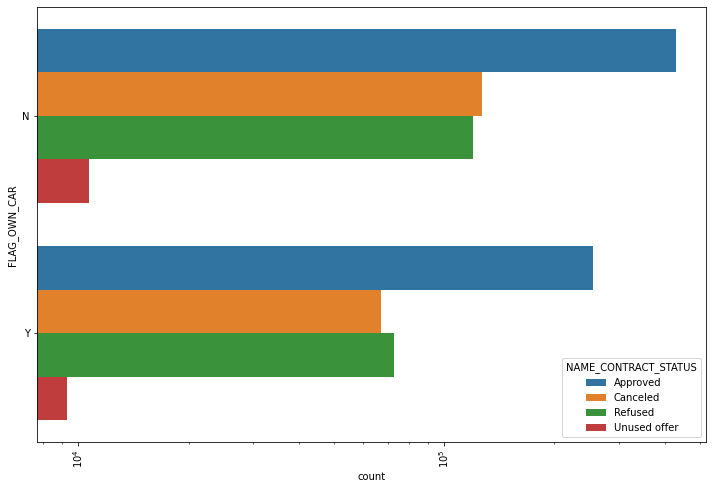

In [136]:
custom_countplot('FLAG_OWN_CAR')

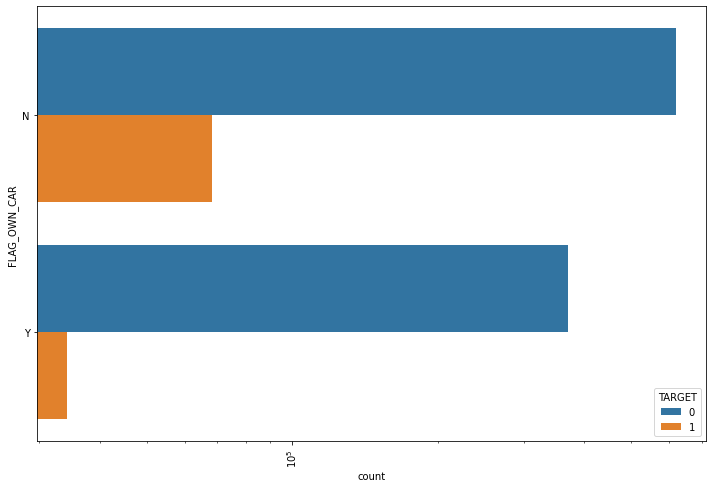

In [137]:
custom_countplot_Target('FLAG_OWN_CAR')

- <b>Not having a car seems to be congruent with more people having payment difficulties.<b>

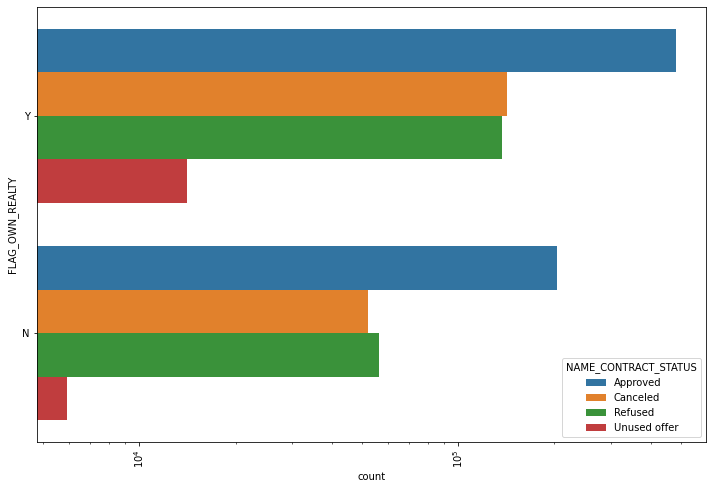

In [138]:
custom_countplot('FLAG_OWN_REALTY')

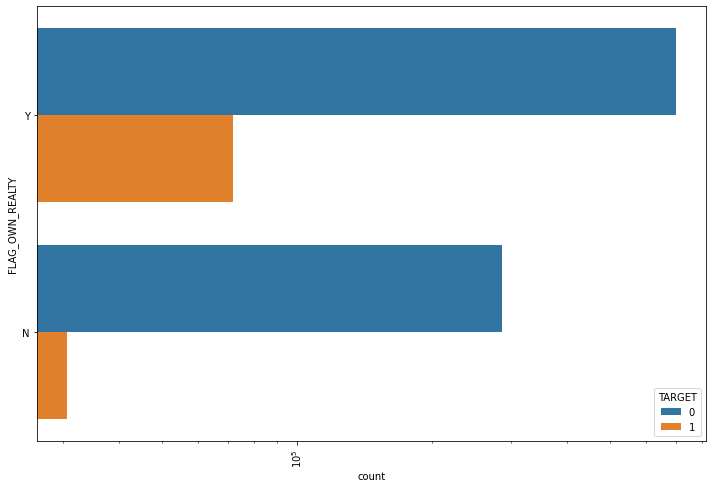

In [139]:
custom_countplot_Target('FLAG_OWN_REALTY')

<b>Possessing a reality seems to be congruent with more people having payment difficulties.</b>

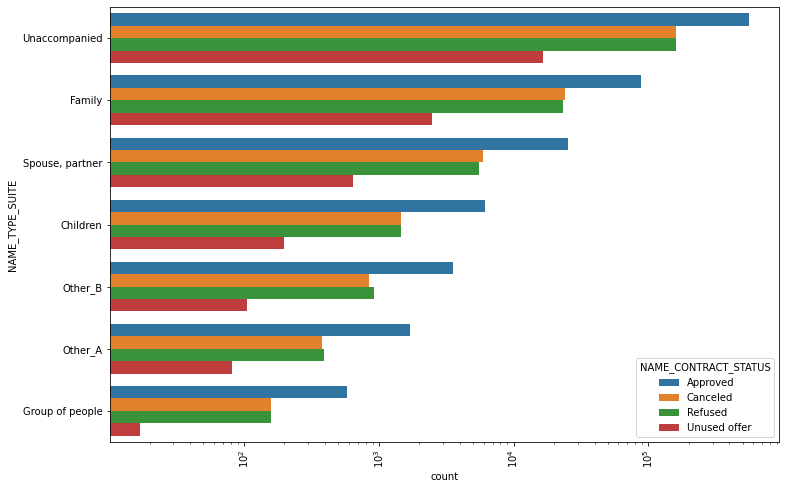

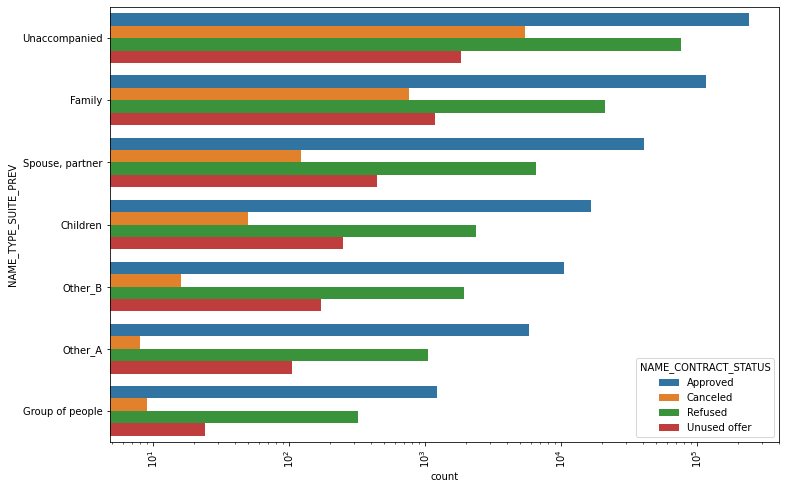

In [140]:
custom_countplot('NAME_TYPE_SUITE')
custom_countplot('NAME_TYPE_SUITE_PREV')

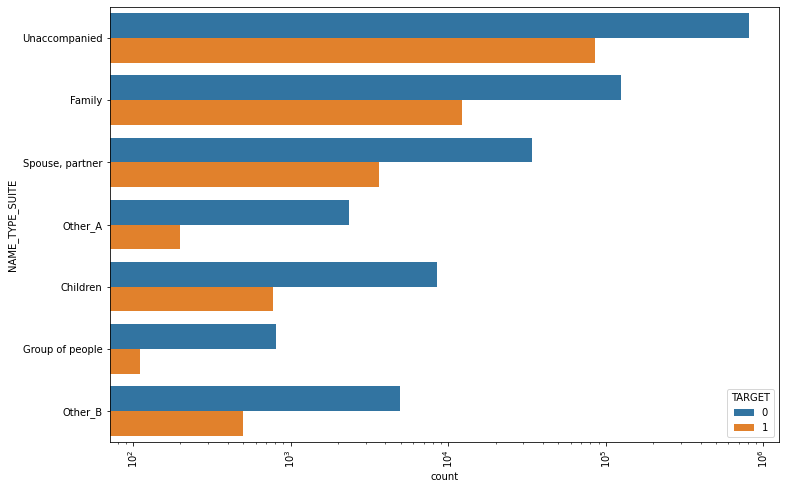

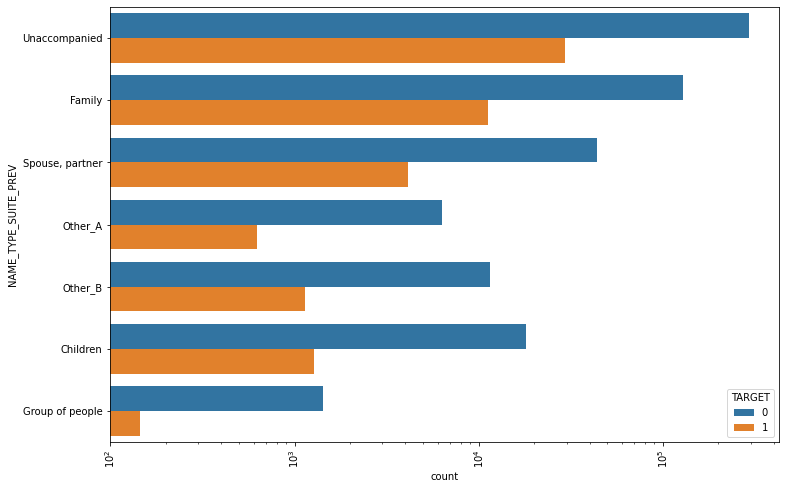

In [141]:
custom_countplot_Target('NAME_TYPE_SUITE')
custom_countplot_Target('NAME_TYPE_SUITE_PREV')

<b>From the above 4 graphs, comparing Types of people from current and previous application, those living with family, having a spouse and children are low in number in terms of facing payment difficulties as compared to those who are unaccompanied</b>

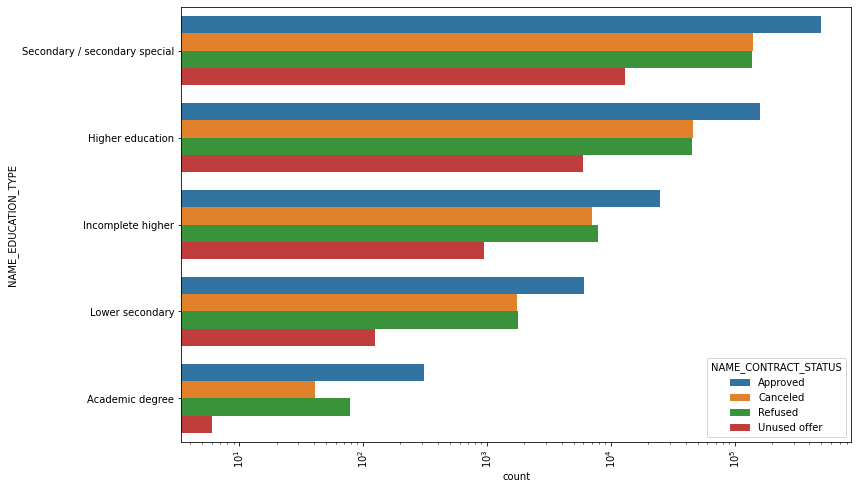

In [142]:
custom_countplot('NAME_EDUCATION_TYPE')

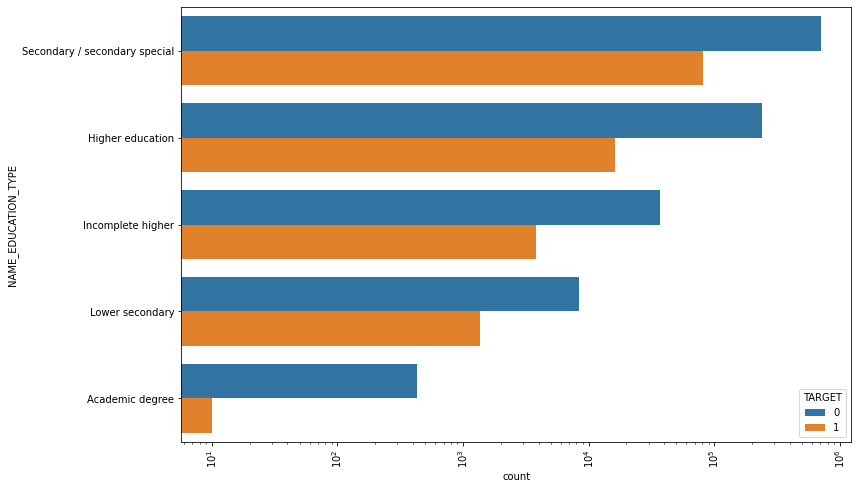

In [143]:
custom_countplot_Target('NAME_EDUCATION_TYPE')

<b> Those who are at the extreme ends of education spectrum are least likely to have cancelled or refused loan offer. This is corroborated by data for those with lower secondary on one end of the spectrum and those with academic degree on the other end of the spectrum.


The above observation is supported by the Target 0 and Target 1 statistic. Those who are at the extreme ends of education spectrum are least likely to have payment diffuculties. This is corroborated by data for those with lower secondary on one end of the spectrum and those with academic degree on the other end of the spectrum.</b>

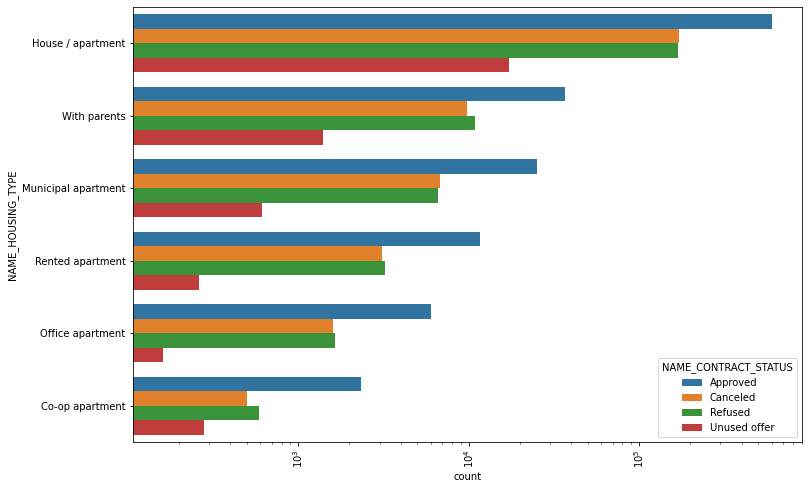

In [144]:
custom_countplot('NAME_HOUSING_TYPE')

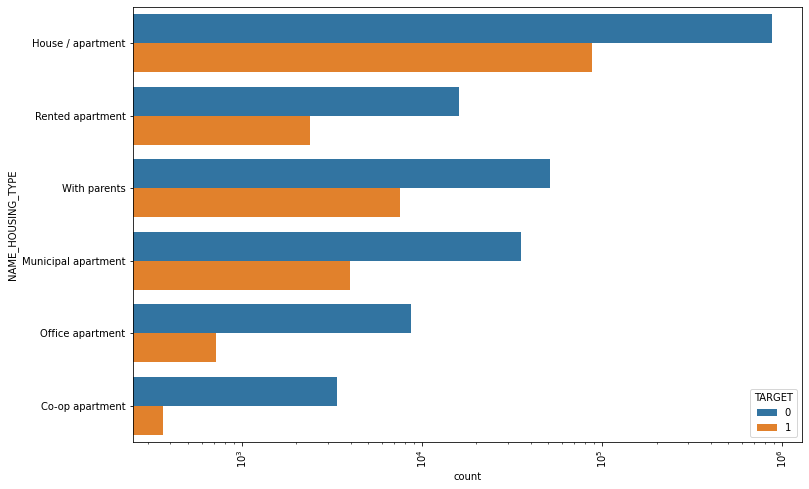

In [145]:
custom_countplot_Target('NAME_HOUSING_TYPE')

<b>Those with office apartment or with co-op apartment are least likely to have cancelled or refused loan offer.


The above observation is supported by the Target 0 and Target 1 statistic. Those with office apartment or with co-op apartment are least likely to have payment diffuculties. This could be on account of having savings owing to not paying up front for either owning a house or monthly payments in the case of rented appartment.</b>

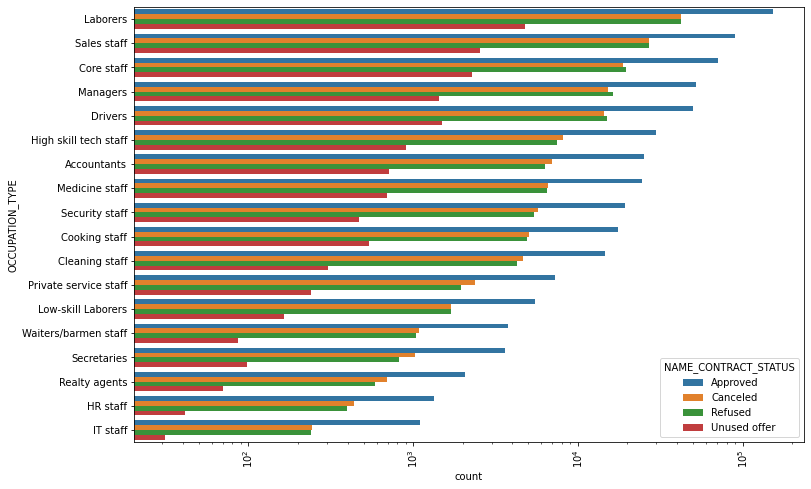

In [146]:
custom_countplot('OCCUPATION_TYPE')

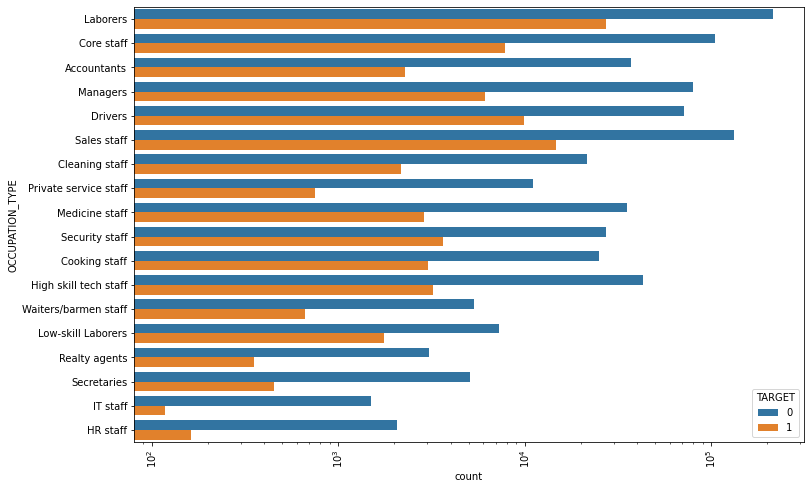

In [147]:
custom_countplot_Target('OCCUPATION_TYPE')

<b>From the above two graphs, white collar job workers such as Private Service Staff, Realty Agents, Secretaries, IT Staff, and HR Staff are least likely to have payment difficulties owing to the high market value of the services they provide in comparison to blue collar job workers such as Laborers, Core Staff, Drivers, Cleaning Staff, Security, Cooking Staff.</b>

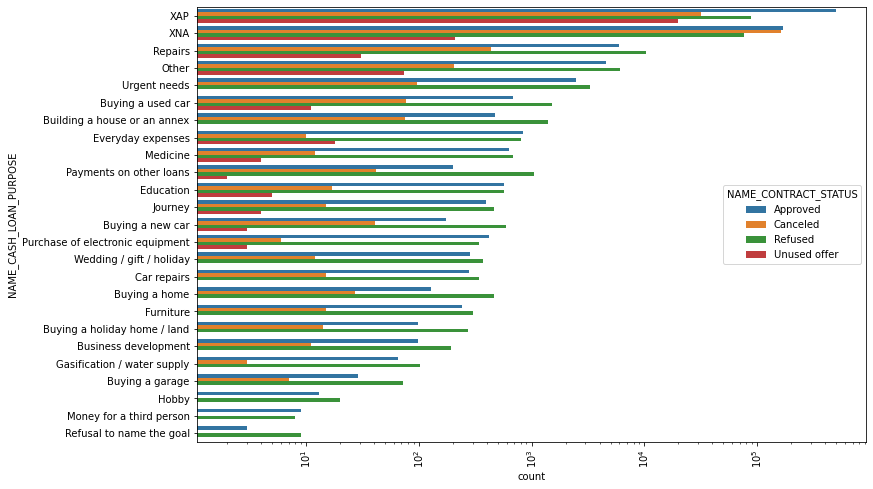

In [148]:
custom_countplot('NAME_CASH_LOAN_PURPOSE')

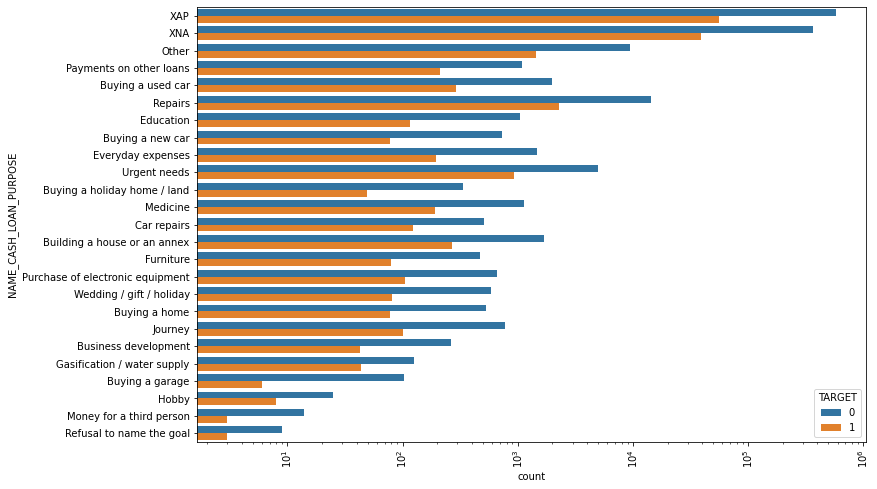

In [149]:
custom_countplot_Target('NAME_CASH_LOAN_PURPOSE')

<b>From the above two graphs, highest number of application were for repairs, others and urgent needs. Also, those who have applied for repairs, others and urgent needs are the ones having highest likelihood of payment difficulties.
    
    
Whereas people taking loans for buying a garage, hobbing have least likelihood for facing payment difficulties.</b>

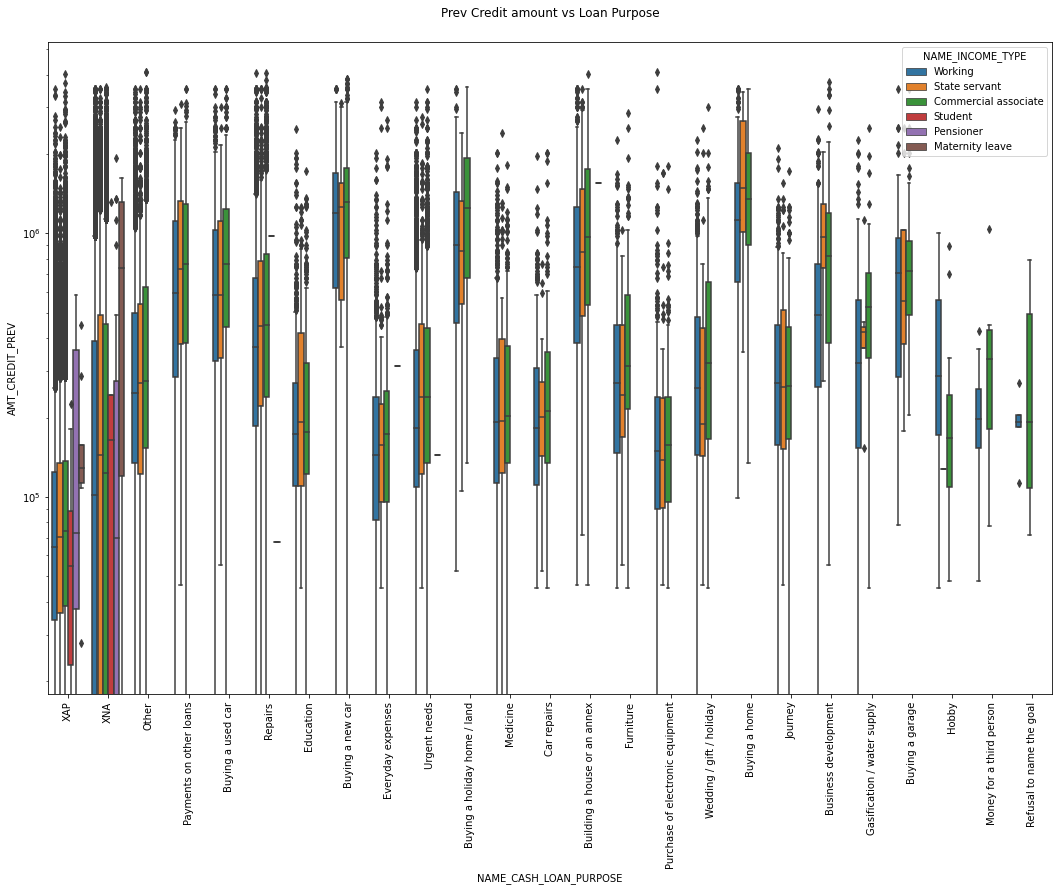

In [150]:
plt.figure(figsize=(18,12))

sns.boxplot(data =merged_appl, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount vs Loan Purpose')

plt.show()

<b>Loan for buying a new car, buying holiday home/land, buying house journey, payments on other loans are higher compared to other loan purposes. This highlights people are applying for loan when they need to purchase something new.

Students and pensioners income type people have very limited credit.

XNA and XAP have data collection highlights loans are applied by all category of clients and even the loan amount is for basic loan between Rs 1 Lac - Rs 2 Lac.

This also suggests that the data collection system of bank can be improved in order to get clearer understanding of loan disbursal.

Overall working category, state servants and commercial associates are the clients bank can focus on in terms of ensuring proper loan facility as they are the consumers of loan and can create income opportunity for bank.</b>

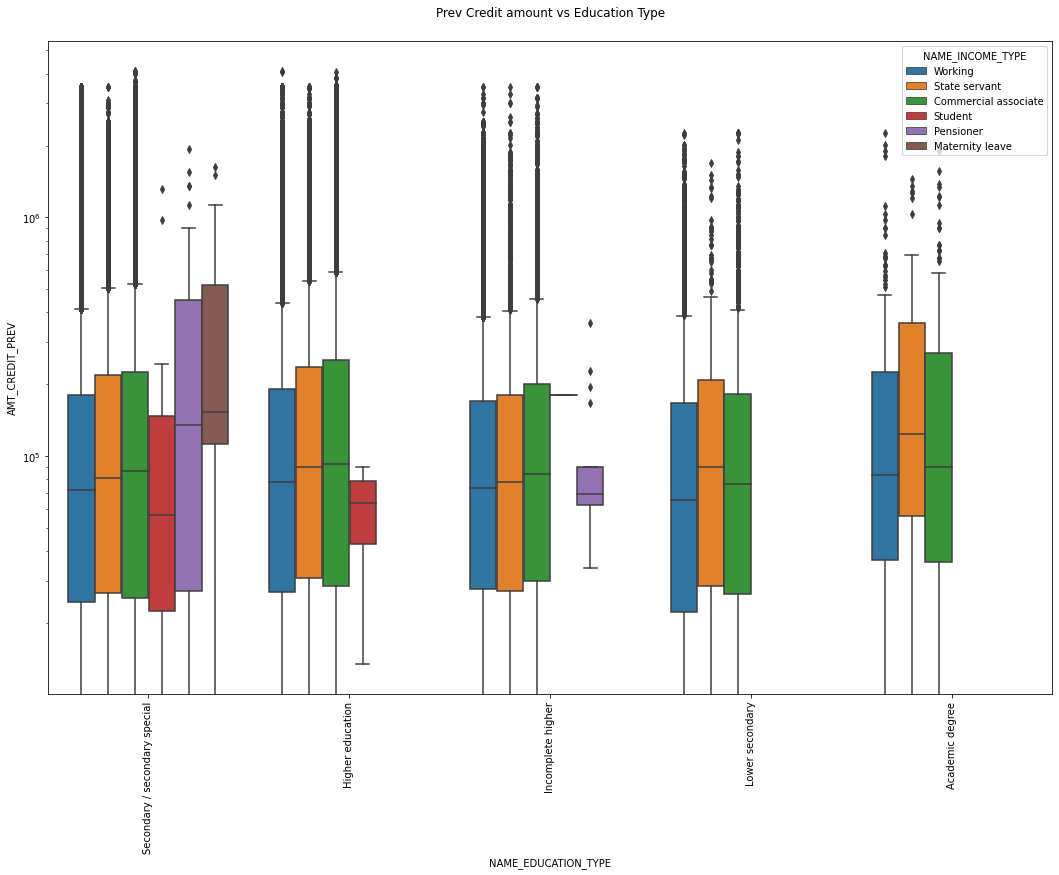

In [151]:
plt.figure(figsize=(18,12))

sns.boxplot(data =merged_appl, x='NAME_EDUCATION_TYPE', hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount vs Education Type')

plt.show()

<b>From the previous application, people having an academic degree have applied for a higher value loan at 75th percentile compared to people having other types of education.

What comes off very unique is that Pensioner and those on Maternity leave with secondary degree have applied for even higher value loan at 75th percentile compared to people who have an academic degree. For pensioners, it could be on account for steady source of income post retirement which allows them to aspire for a higher value loan. Whereas, those on maternity leave aspire for their children's better future which compells them to go for higher value loan.</b>

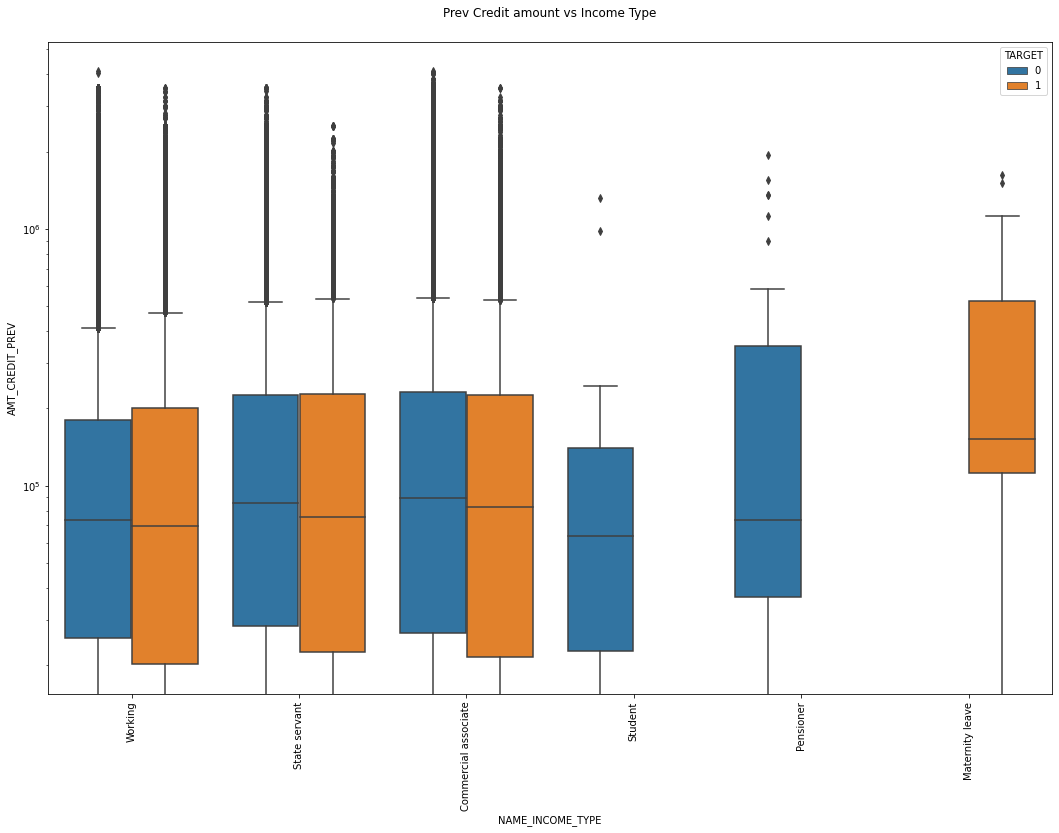

In [152]:
plt.figure(figsize=(18,12))

sns.boxplot(data =merged_appl, x='NAME_INCOME_TYPE', hue='TARGET',y='AMT_CREDIT_PREV',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount vs Income Type')

plt.show()

## 8. Conclusion/ Suggestions
<b>From above analysis, following needs to be considered for approving or rejecting the loan:
 
1. Quite few applications were rejected because clients applied for consumers loans.
    

2. Bank should focus on less number of working type clients as they are the highest defaulters of loan.
    

3. Bank can avoid giving loans for repairs as it is show clients applying for repairs loan have difficulty in repaying the loan.

    
4. Also focus on clients living with parents as they have less difficulties in making payments on time.
    

5. High number of loan applications are rejected for clients who have applied for loan between Rs 1 Lac and Rs 5 Lac.

    
6. Correlation between amount credit and amount good price is high and similar in both target clients of 0 and 1.

    
7. Bank can focus on giving more loan to people who have no children and staying with parents as they have high repayment and less defaults.</b>